In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

# Importing visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [3]:
df = pd.read_csv('Leads.csv')

In [4]:
#Checking head of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the data

In [5]:
#checking dimension of data frame
df.shape

(9240, 37)

In [6]:
#checking type and non-null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# checking statistical aspects of dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

Dealing with the "Select" level that appears in many category variables.

We notice that numerous columns have "Select" values. The reason it says "Select" could be that the buyer did not choose any item from the list. Values in 'Select' are equivalent to NULL. Thus, these parameters can be changed to null values.

In [8]:
#converting "select" to Nan
df = df.replace("Select", np.nan)

In [9]:
#checking null count
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# checking null in percentage
round(df.isnull().mean(),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Dropping column with missing values.



In [11]:
#We can dropping column with missing values greater than or equal to 40%.
df = df.drop(['How did you hear about X Education', 
              'Lead Quality', 'Lead Profile',
              'City',
              'Asymmetrique Activity Index', 
              'Asymmetrique Profile Index',
              'Asymmetrique Activity Score', 
              'Asymmetrique Profile Score'],axis=1)

In [12]:
#again check null in percentage after removing above columns
round(df.isnull().mean(),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

Column '**Country**' has 27% of missing values.


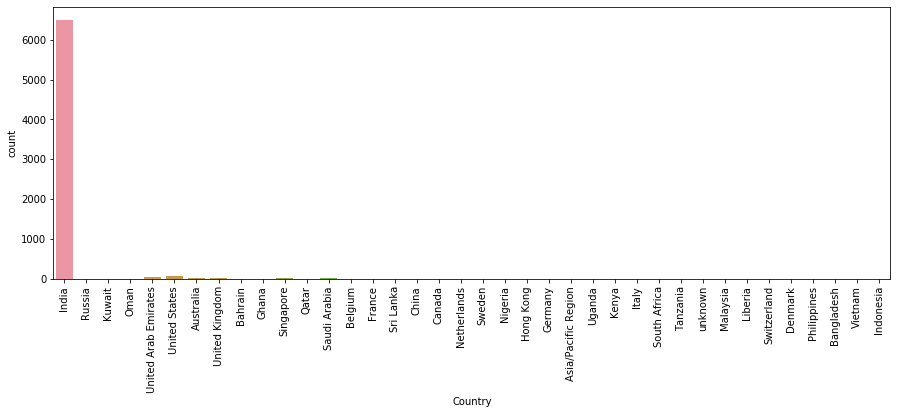

In [13]:
# plotting boxplot for visualization
plt.figure(figsize=(15,5))
sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.show()

Although this column is clearly heavily biased, it contains crucial information with regard to the lead. As "India" appears in the majority of values, we may use this value to fill in any gaps in this column.

In [14]:
#imputing the missing data in the "Country" column with "India"
df["Country"] = df["Country"].replace(np.nan, "India")

Column '**Specialization**' has 37% of missing values.

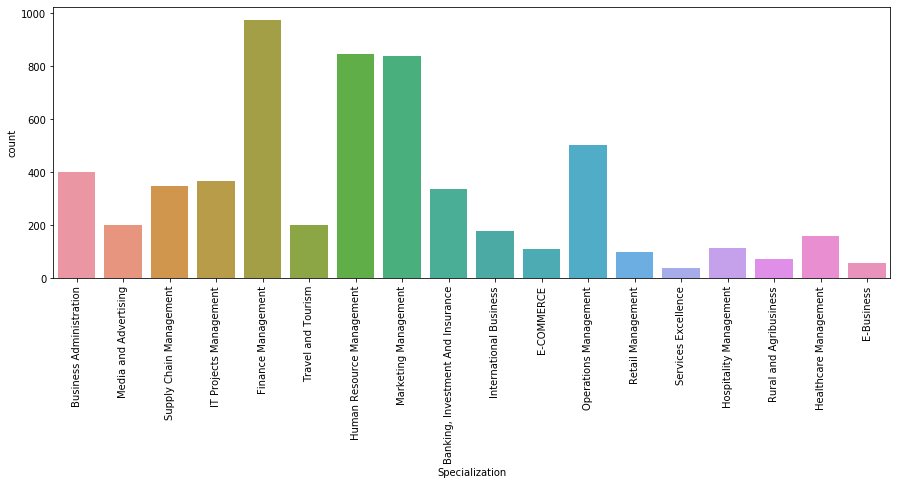

In [15]:
# plotting boxplot for visualization
plt.figure(figsize=(15,5))
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [16]:
#finding the percentage of the different categories of this column:
round(df['Specialization'].value_counts(normalize = True),2)*100

Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Media and Advertising                 3.0
Travel and Tourism                    3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

In the 'Specialization' column, there are 37% missing values. Due to the lack of his specialty among the available possibilities, the lead may decide to leave this section empty. So, we can add a new category called "Others" for this.

In [17]:
#replacing nan with "Other"
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

Column '**What is your current occupation**' has 29% of missing values.

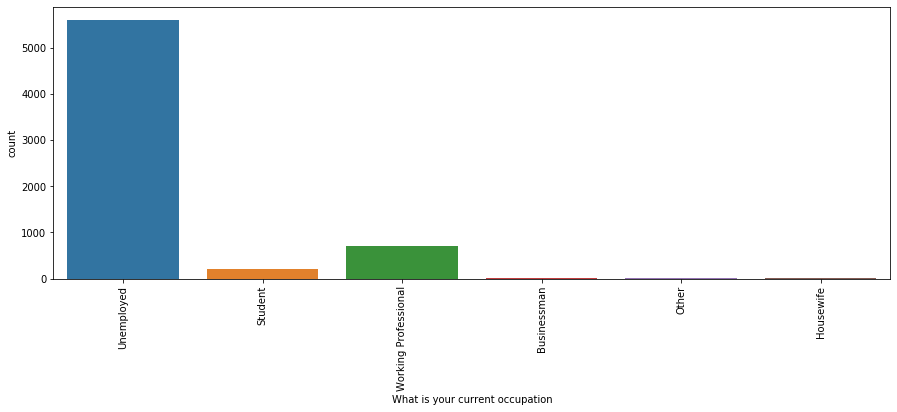

In [18]:
# plotting boxplot for visualization
plt.figure(figsize=(15,5))
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [19]:
#finding the percentage of the different categories of this column:
round(df['What is your current occupation'].value_counts(normalize = True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

As "Unemployed" is the most common value, we can substitute "Unemployed" for missing values in this column.

In [20]:
#replacing nan with "Unemployment"
df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan, "Unemployed")

Column '**What matters most to you in choosing a course**' has 29% of missing 

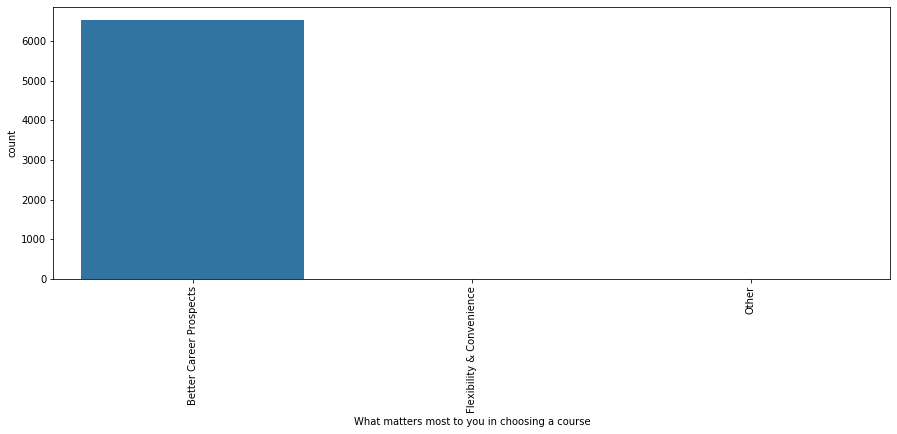

In [21]:
# plotting boxplot for visualization
plt.figure(figsize=(15,5))
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [22]:
#finding the percentage of the different categories of this column:
round(df['What matters most to you in choosing a course'].value_counts(normalize = True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can eliminate this column because it is clearly very skewed.

In [23]:
#dropping "What matters most to you in choosing a course" column
df = df.drop('What matters most to you in choosing a course', axis = 1)

Column '**Tags**' has 36% of missing values.


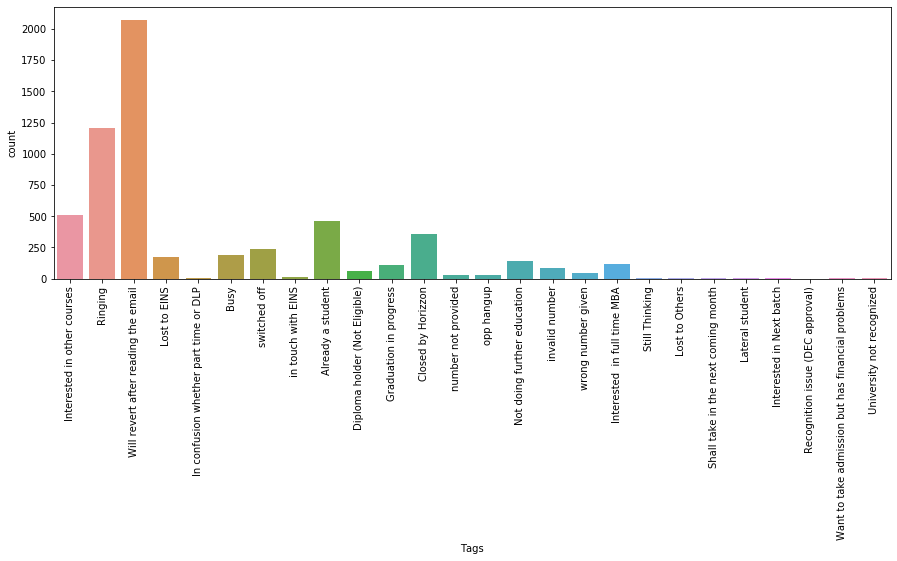

In [24]:
# plotting boxplot for visualization
plt.figure(figsize=(15,5))
sns.countplot(df['Tags'])
plt.xticks(rotation=90)
plt.show()

As "Will revert after reading the email" is the most common value, we may use this value to fill up any missing vales in this field.

In [25]:
#replacing nan with "Will revert after reading the mail" 
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

In [26]:
#again check null in percentage after removing null from above columns
round(df.isnull().mean(),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Rest missing values are under 2% so we can drop these rows.


In [27]:
#dropping rows with null values
df.dropna(inplace = True)

In [28]:
#again check null in percentage after dropping rows with null values.
round(df.isnull().mean(),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [29]:
#checking data types of each column
df.dtypes

Prospect ID                                  object
Lead Number                                   int64
Lead Origin                                  object
Lead Source                                  object
Do Not Email                                 object
Do Not Call                                  object
Converted                                     int64
TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
Last Activity                                object
Country                                      object
Specialization                               object
What is your current occupation              object
Search                                       object
Magazine                                     object
Newspaper Article                            object
X Education Forums                           object
Newspaper                                    object
Digital Adve

In [30]:
#checking shape of data frame
df.shape

(9074, 28)

## Exploratory Data Anaysis

###Univariate Analysis & Bivarient Analysis

**1)Converted: "Converted"** is Target Variable. **"1"** indicate lead coverted successful & **"0"** indicate lead not converted.

In [31]:
#checking unique value of column "Converted"
df.Converted.value_counts(normalize = True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

There is a 38% lead conversion rate.

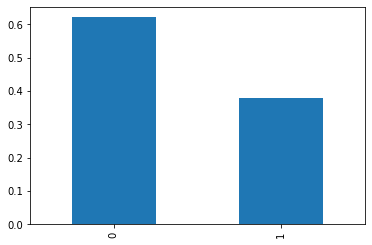

In [32]:
# plotting bargraph for visualization
df.Converted.value_counts(normalize = True).plot.bar()
plt.show()

**2)Lead Origin**


In [33]:
df.groupby("Lead Origin")['Converted'].mean()*100

Lead Origin
API                        31.162661
Landing Page Submission    36.171955
Lead Add Form              93.631670
Lead Import                30.000000
Name: Converted, dtype: float64

In [34]:
df.groupby("Lead Origin")['Converted'].count()

Lead Origin
API                        3578
Landing Page Submission    4885
Lead Add Form               581
Lead Import                  30
Name: Converted, dtype: int64

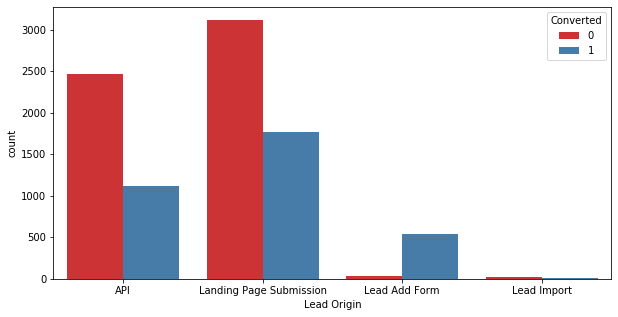

In [35]:
# plotting bargraph for visualization
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Lead Origin", hue="Converted", palette='Set1')
plt.show()

**Conclusion:**

1] More then 90% of leads are generated from **API** & **Landing Page Submission** but conversion rate is about 30% to 35%  of total count.

2]**Lead Add Form** has more than 90% of conversion rate but leads generation is less than 5%.

3]**Lead import** has least count.



**3)Lead Source**

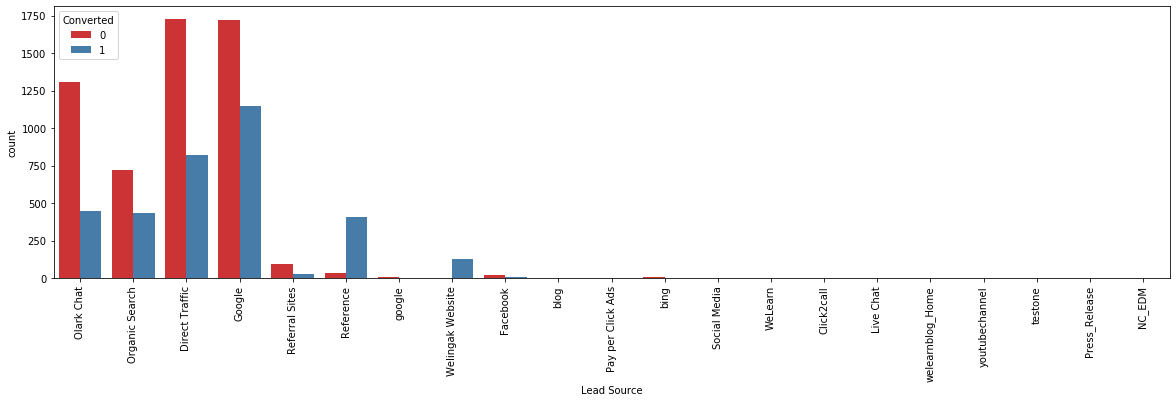

In [36]:
# plotting bargraph for visualization
plt.figure(figsize=(20,5))
sns.countplot(data=df, x="Lead Source", hue="Converted", palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [37]:
#changing 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

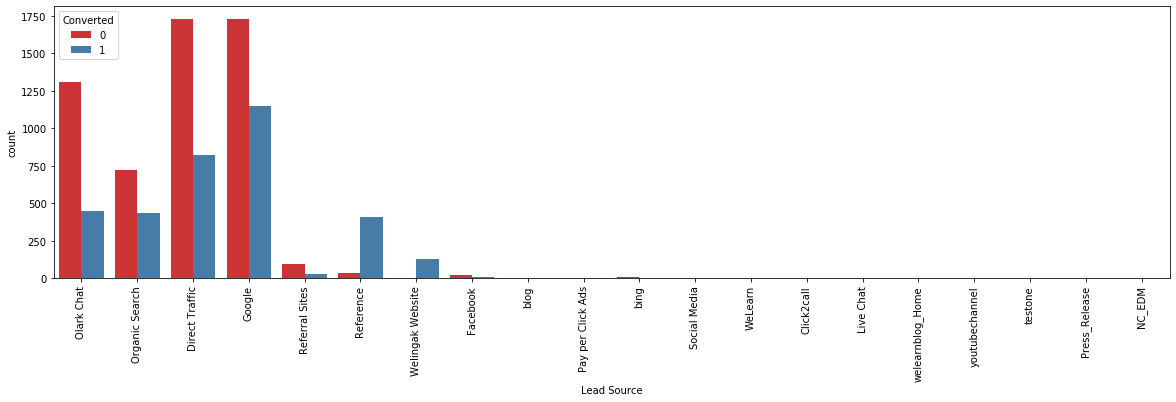

In [38]:
# plotting bargraph for visualization
plt.figure(figsize=(20,5))
sns.countplot(data=df, x="Lead Source", hue="Converted", palette='Set1')
plt.xticks(rotation = 90)
plt.show()

**Conclusion:**

1] Maximum leads are generated from **Google** & **Direct Traffic**.

2] Maximum leads are converted through **Reference** & **Welingak Website**.



**4) Do Not Email**

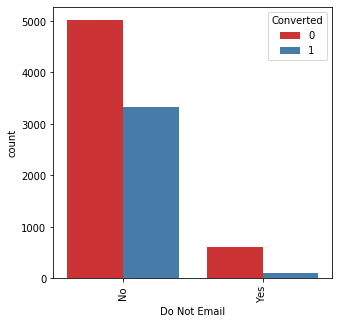

In [39]:
# plotting bargraph for visualization
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="Do Not Email", hue="Converted", palette='Set1')
plt.xticks(rotation = 90)
plt.show()

**Conclusion**: 

Maximum entries are no so conclusion can be drawn with this parameter.

**5) Do Not Call**

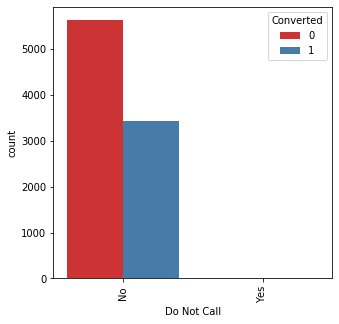

In [40]:
# plotting bargraph for visualization
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="Do Not Call", hue="Converted", palette='Set1')
plt.xticks(rotation = 90)
plt.show()

**Conclusion**: 

Maximum entries are no so conclusion can be drawn with this parameter.

**6) TotalVisits**

In [41]:
# checking statistical aspects of 'TotalVisits'
df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

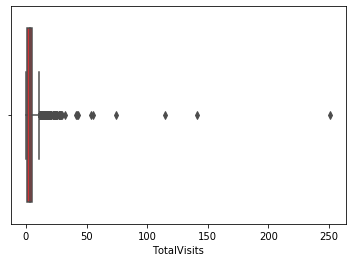

In [42]:
# plotting boxplot for visualization
sns.boxplot(df['TotalVisits'],palette='Set1')
plt.show()

As we can see, the data contains a lot of outliers. For analysis, we will set a 95% value cap on the outliers.

In [43]:
#caping value to 95%
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

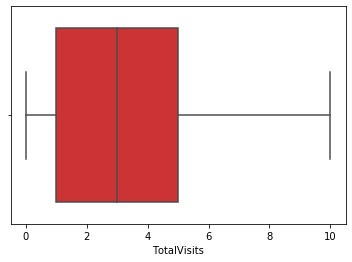

In [44]:
#plotting bargraph again for visualization again
sns.boxplot(df['TotalVisits'],palette='Set1')
plt.show()

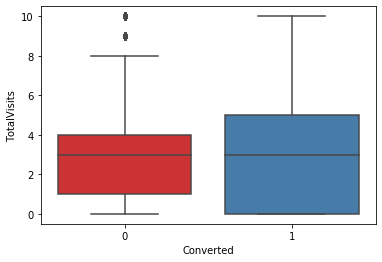

In [45]:
# plotting boxplot for visualization
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df ,palette='Set1')
plt.show()

**Conclusion**

Medians are same for both "0" and "1". So we cannot drawn conclision with this parameter.



**7)Total Time Spent on Website**

In [46]:
#checking stats of "Total Time Spent on Website"
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

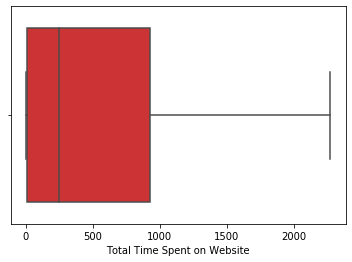

In [47]:
# plotting boxplot for visualization
sns.boxplot(df['Total Time Spent on Website'],palette='Set1')
plt.show()

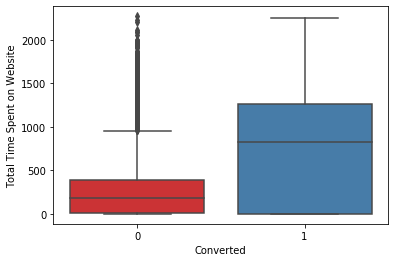

In [48]:
# plotting boxplot for visualization
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df,palette='Set1')
plt.show()

**Conclusion**

Leads who spend more time on the website have a higher chance of being converted.

**8)Page Views Per Visit**

In [49]:
#checking stats of "Page View Per Visit"
df['Page Views Per Visit'].describe()


count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

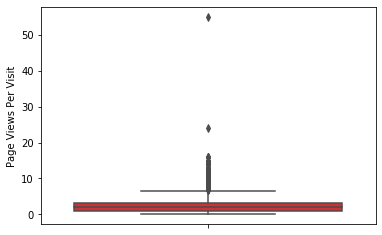

In [50]:
# plotting boxplot for visualization
sns.boxplot(df['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

As we can see, the data contains a lot of outliers. For analysis, we will set a 95% value cap on the outliers.

In [51]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

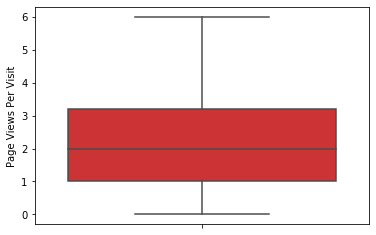

In [52]:
# Visualizing again
sns.boxplot(df['Page Views Per Visit'],palette='Set1',orient='vert')
plt.show()

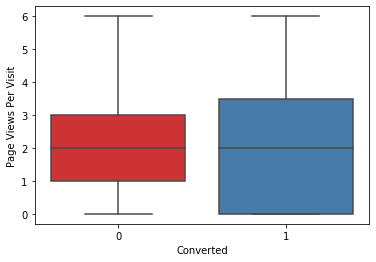

In [53]:
# plotting boxplot for visualization
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df,palette='Set1')
plt.show()

**Conclusion**

Medians are same for both "0" and "1". So we cannot drawn conclision with this parameter.

**9)Last Activity**


In [54]:
df["Last Activity"].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [55]:
df.groupby("Last Activity")['Converted'].count()

Last Activity
Approached upfront                 5
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Email Marked Spam                  2
Email Opened                    3432
Email Received                     2
Form Submitted on Website        116
Had a Phone Conversation          25
Olark Chat Conversation          972
Page Visited on Website          640
Resubscribed to emails             1
SMS Sent                        2716
Unreachable                       90
Unsubscribed                      59
View in browser link Clicked       6
Visited Booth in Tradeshow         1
Name: Converted, dtype: int64

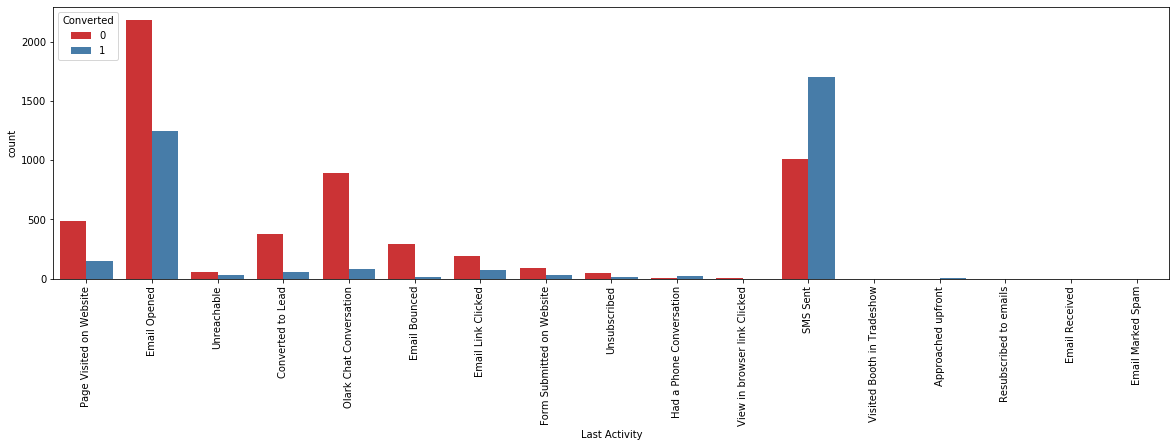

In [56]:
# plotting boxplot for visualization
plt.figure(figsize=(20,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df, palette = "Set1")
plt.xticks(rotation = 90)
plt.show()

**Conclusion**

1] The majority of the leads' most recent action was **Email Opened**.

2] About 70% of leads with an **SMS sent** as their most recent activity converted.

**10) Country**

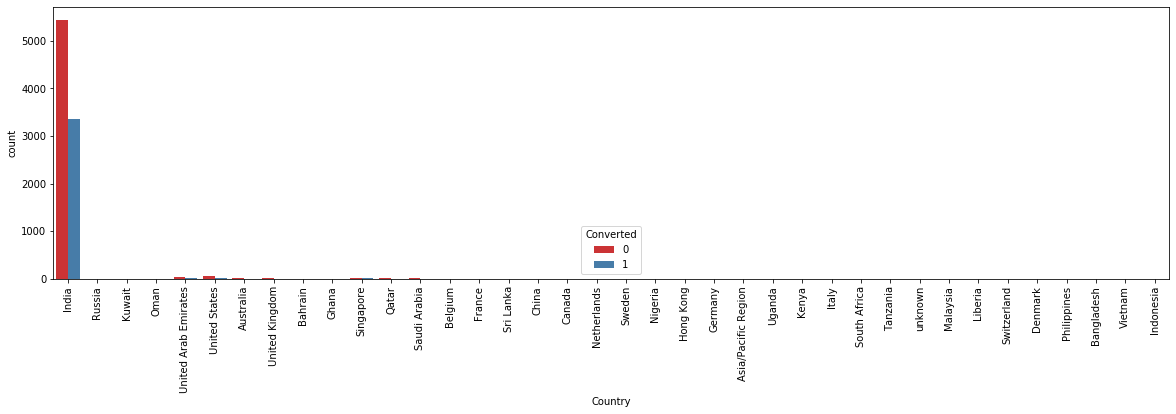

In [57]:
# plotting boxplot for visualization
plt.figure(figsize=(20,5))
sns.countplot(x = "Country", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

**Conclusion**

Majority values are **India**, therefore no such conclusion can be made.

**11)Specialization**

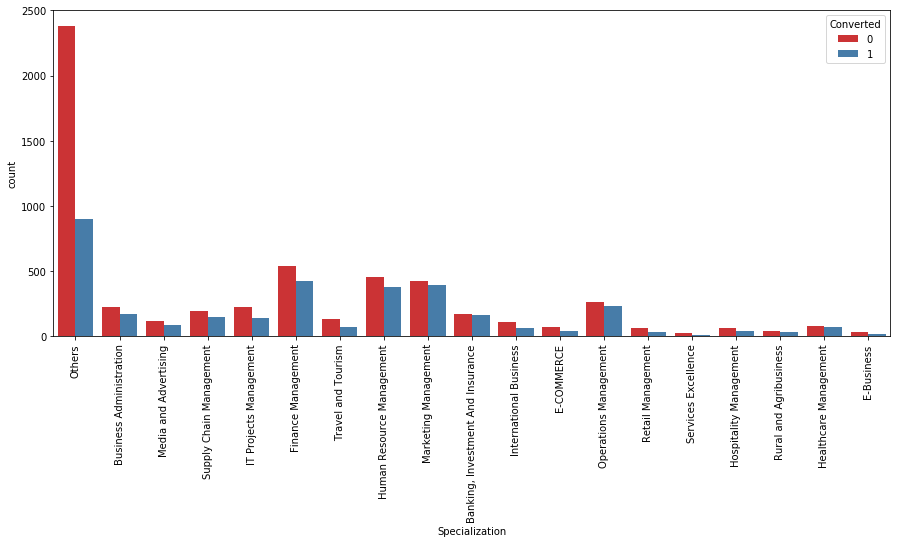

In [58]:
# plotting boxplot for visualization
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

**Conclusion**

The Specialization with the highest conversion rate should be prioritised.

**12)What is your current occupation**

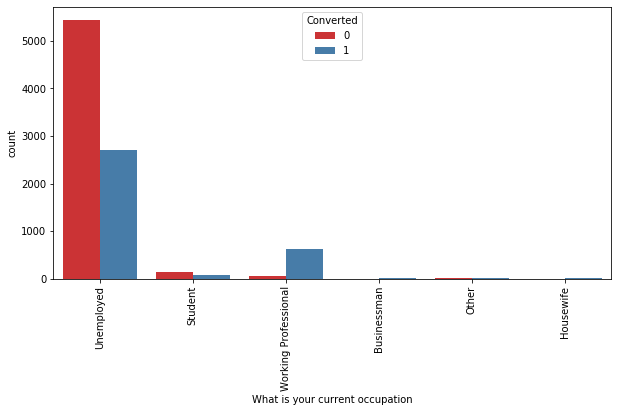

In [59]:
# plotting boxplot for visualization
plt.figure(figsize=(10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Maximum leads are generated from **Unemployed** but maximum lead are converted from **Working Professional**.

**13)Search**

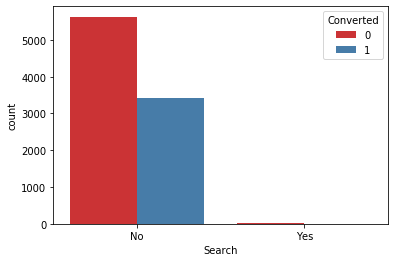

In [60]:
# plotting boxplot for visualization
sns.countplot(x = "Search", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**14) Magazine**

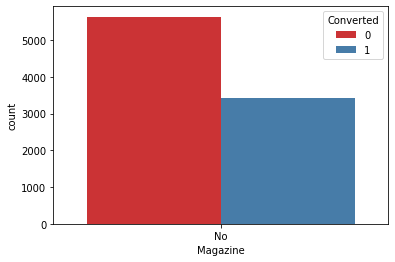

In [61]:
# plotting boxplot for visualization
sns.countplot(x = "Magazine", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**15) Newspaper Article**

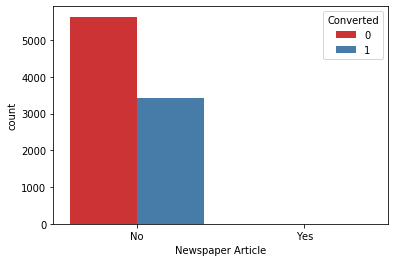

In [62]:
# plotting boxplot for visualization
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**16) X Education Forums**

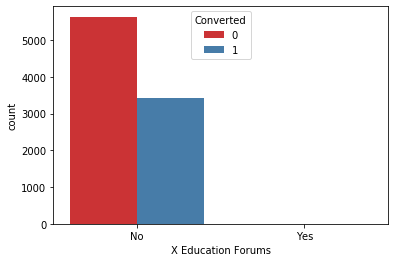

In [63]:
# plotting boxplot for visualization
sns.countplot(x = "X Education Forums", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**17) Newspaper**

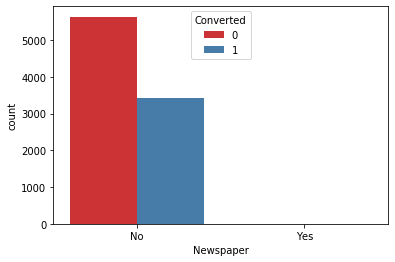

In [64]:
# plotting boxplot for visualization
sns.countplot(x = "Newspaper", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**18) Digital Advertisement**


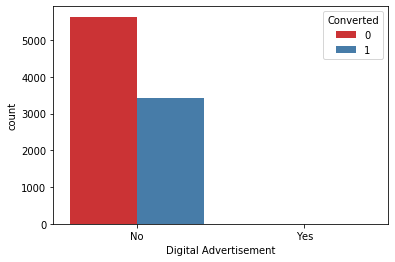

In [65]:
# plotting boxplot for visualization
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**19) Through Recommendations**

<function matplotlib.pyplot.show(*args, **kw)>

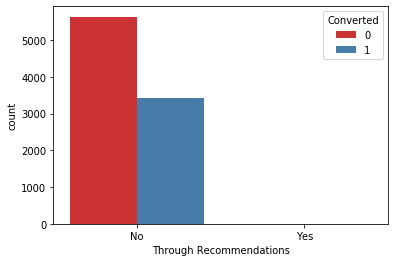

In [66]:
# plotting boxplot for visualization
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df,palette='Set1')
plt.show

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**20) Receive More Updates About Our Courses**


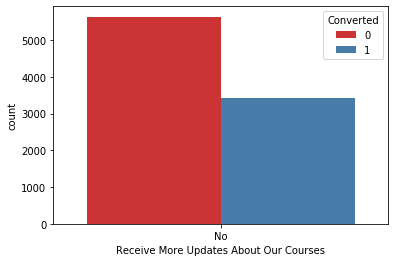

In [67]:
# plotting boxplot for visualization
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**21)Update me on Supply Chain Content**

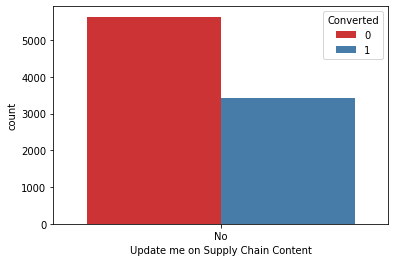

In [68]:
# plotting boxplot for visualization
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**22) Get updates on DM Content**

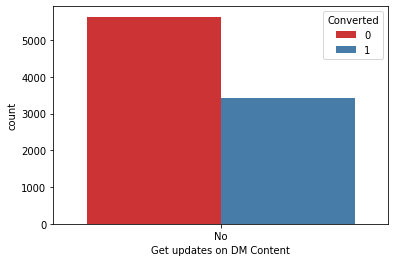

In [69]:
# plotting boxplot for visualization
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**23) I agree to pay the amount through cheque**

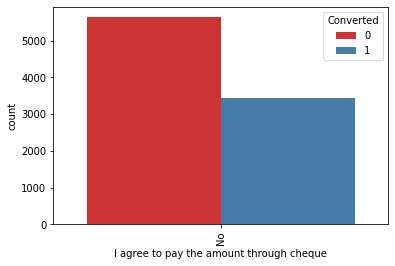

In [70]:
# plotting boxplot for visualization
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**24) A free copy of Mastering The Interview**

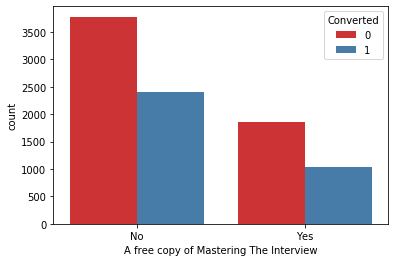

In [71]:
# plotting boxplot for visualization
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df,palette='Set1')
plt.show()

**Conclusion:**

Most responses are **No.** This parameter cannot be used to draw any **conclusion**.

**Result**

We can remove numerous columns, based on the results of the **Univariate Analysis** and **Bivariate Analysis**, as they don't provide any new information.

In [72]:
df = df.drop(['Tags',
              'Country',
              'Search',
              'Magazine',
              'Lead Number',
              'Newspaper Article',
              'X Education Forums',
              'Newspaper',
              'Digital Advertisement',
              'Through Recommendations',
              'Update me on Supply Chain Content',
              'Get updates on DM Content',
              'I agree to pay the amount through cheque',
              'Receive More Updates About Our Courses',
              'A free copy of Mastering The Interview'],axis = 1)

In [73]:
df.shape

(9074, 13)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Last Notable Activit

In [75]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified


**Data Preparation**

1) Converting some binary variables (Yes/No) to 1/0


In [76]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

In [77]:
#checking the changes in data frame.
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified


2) For categorical variable with multiple levels, create dummy features.

In [78]:
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [79]:
# Concatenating the dummy_data to the lead_data dataframe
df = pd.concat([df, dummy_data], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [80]:
#dropping the columns for which dummies were created
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity'], axis = 1)

In [81]:
#checking data
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


**Splitting data into train and test set.**

In [82]:
#Importing train test from sklearn library
from sklearn.model_selection import train_test_split

In [83]:
#Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
#putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
#from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

**Feature scaling**

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [87]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
pd.set_option('display.max_columns', None)
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [88]:
#checking lead conversion rate
Converted = df["Converted"].mean()*100
Converted

37.85541106458012

We have approximately 38% lead converson rate.

**Feature selection using RFE( Recursive Feature Elimination)**

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [90]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True, False,  True,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True, False, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 17),
 ('Lead Source_NC_EDM', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 25),
 ('Lead Source_Press_Release', False, 23),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_blog', True, 1),
 ('Lead Source_testone', False, 21),
 ('Lead Source_welearnblog_Home', False, 

In [93]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_blog', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Marked Spam',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemp

In [94]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Email Received', 'Last Activity_Page Visited on Website',
       'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',


## Model Building

#### Assessing the model with StatsModels

Model 1


In [95]:
import statsmodels.api as sm

In [96]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.3
Date:                Tue, 28 Feb 2023   Deviance:                       5124.6
Time:                        10:14:41   Pearson chi2:                 6.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8313      1.135      1.613      0.107      -0.394       4.056
Do Not Email                                            -1.6256      0.221     -7.341      0.000      -2.060      -1.192
Do Not Call                                             21.6558    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1075      0.041     26.949      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.0223      0.135     -7.581      0.000      -1.287      -0.758
Lead Origin_Lead Add Form                                0.9237      0.932      0.991      0.321      -0.902       2.750
Lead Source_Direct Traffic                              -0.9166      0.404     -2.268      0.023      -1.709      -0.124
Lead Source_Google                                      -0.6270      0.399     -1.573      0.116      -1.408       0.154
Lead Source_Olark Chat                                   0.4053      0.401      1.010      0.312      -0.381       1.191
Lead Source_Organic Search                              -0.8241      0.407     -2.027      0.043      -1.621      -0.027
Lead Source_Reference                                    1.6948      0.912      1.859      0.063      -0.092       3.482
Lead Source_Referral Sites                              -0.9645      0.521     -1.852      0.064      -1.985       0.056
Lead Source_Social Media                                 0.9288      1.555      0.597      0.550      -2.119       3.977
Lead Source_Welingak Website                             4.2583      1.145      3.717      0.000       2.013       6.503
Lead Source_blog                                       -22.4472   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Activity_Converted to Lead                         -0.8458      0.238     -3.552      0.000      -1.312      -0.379
Last Activity_Email Bounced                             -1.0282      0.641     -1.603      0.109      -2.285       0.229
Last Activity_Email Marked Spam                         11.0769   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
Last Activity_Form Submitted on Website                 -0.4748      0.351     -1.354      0.176      -1.162       0.212
Last Activity_Had a Phone Conversation                   2.0832      1.136      1.833      0.067      -0.144       4.310
Last Activity_Olark Chat Conversation                   -1.2072      0.208     -5.809      0.000      -1.615      -0.800
Last Activity_Resubscribed to emails                    11.7034   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0

In [97]:
#Dropping the column 'What is your current occupation_Housewife'. since Pvalue is high.
col1 = cols.drop('What is your current occupation_Housewife')

Model 2

In [98]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.4
Date:                Tue, 28 Feb 2023   Deviance:                       5128.7
Time:                        10:14:41   Pearson chi2:                 6.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3242      1.109      2.095      0.036       0.150       4.498
Do Not Email                                            -1.6308      0.222     -7.357      0.000      -2.065      -1.196
Do Not Call                                             20.6605      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1064      0.041     26.940      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0145      0.135     -7.531      0.000      -1.279      -0.751
Lead Origin_Lead Add Form                                0.9266      0.932      0.995      0.320      -0.899       2.753
Lead Source_Direct Traffic                              -0.9194      0.404     -2.275      0.023      -1.712      -0.127
Lead Source_Google                                      -0.6283      0.399     -1.576      0.115      -1.410       0.153
Lead Source_Olark Chat                                   0.4054      0.401      1.011      0.312      -0.381       1.191
Lead Source_Organic Search                              -0.8221      0.406     -2.023      0.043      -1.619      -0.025
Lead Source_Reference                                    1.6976      0.912      1.862      0.063      -0.089       3.484
Lead Source_Referral Sites                              -0.9631      0.521     -1.850      0.064      -1.984       0.057
Lead Source_Social Media                                 0.9325      1.554      0.600      0.549      -2.114       3.978
Lead Source_Welingak Website                             4.2563      1.146      3.716      0.000       2.011       6.501
Lead Source_blog                                       -21.4522   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Converted to Lead                         -0.8421      0.238     -3.537      0.000      -1.309      -0.375
Last Activity_Email Bounced                             -1.0208      0.641     -1.592      0.111      -2.278       0.236
Last Activity_Email Marked Spam                         10.5797   1.02e+04      0.001      0.999   -1.99e+04    1.99e+04
Last Activity_Form Submitted on Website                 -0.4772      0.350     -1.363      0.173      -1.163       0.209
Last Activity_Had a Phone Conversation                   2.0860      1.137      1.835      0.066      -0.142       4.314
Last Activity_Olark Chat Conversation                   -1.2064      0.208     -5.799      0.000      -1.614      -0.799
Last Activity_Resubscribed to emails                    11.2030   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0

In [99]:
#Dropping the column"Last Notable Activity_Had a Phone Conversation". since Pvalue is high.	
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

Model 3

In [100]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.5
Date:                Tue, 28 Feb 2023   Deviance:                       5128.9
Time:                        10:14:42   Pearson chi2:                 6.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5078      1.035      2.423      0.015       0.479       4.536
Do Not Email                                            -1.6349      0.222     -7.379      0.000      -2.069      -1.201
Do Not Call                                             20.6601      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1061      0.041     26.935      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0137      0.135     -7.529      0.000      -1.278      -0.750
Lead Origin_Lead Add Form                                0.9276      0.932      0.996      0.319      -0.898       2.754
Lead Source_Direct Traffic                              -0.9188      0.404     -2.273      0.023      -1.711      -0.127
Lead Source_Google                                      -0.6269      0.399     -1.573      0.116      -1.408       0.154
Lead Source_Olark Chat                                   0.4065      0.401      1.014      0.311      -0.380       1.193
Lead Source_Organic Search                              -0.8228      0.406     -2.024      0.043      -1.619      -0.026
Lead Source_Reference                                    1.6982      0.912      1.863      0.062      -0.088       3.485
Lead Source_Referral Sites                              -0.9653      0.521     -1.853      0.064      -1.987       0.056
Lead Source_Social Media                                 0.9334      1.554      0.601      0.548      -2.113       3.979
Lead Source_Welingak Website                             4.2575      1.146      3.717      0.000       2.012       6.503
Lead Source_blog                                       -21.4518   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Converted to Lead                         -0.8410      0.238     -3.533      0.000      -1.308      -0.374
Last Activity_Email Bounced                             -1.0160      0.641     -1.584      0.113      -2.273       0.241
Last Activity_Email Marked Spam                         10.4899   1.02e+04      0.001      0.999   -1.99e+04    1.99e+04
Last Activity_Form Submitted on Website                 -0.4792      0.350     -1.369      0.171      -1.165       0.207
Last Activity_Had a Phone Conversation                   2.4039      0.879      2.733      0.006       0.680       4.128
Last Activity_Olark Chat Conversation                   -1.2053      0.208     -5.794      0.000      -1.613      -0.798
Last Activity_Resubscribed to emails                    11.1113   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0

In [101]:
#Dropping the column "Last Notable Activity_Email Marked Spam	". since Pvalue is high.	
col1 = col1.drop('Last Notable Activity_Email Marked Spam')

Model 4

In [102]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.5
Date:                Tue, 28 Feb 2023   Deviance:                       5128.9
Time:                        10:14:42   Pearson chi2:                 6.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5078      1.035      2.423      0.015       0.479       4.536
Do Not Email                                            -1.6349      0.222     -7.379      0.000      -2.069      -1.201
Do Not Call                                             20.6601      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1061      0.041     26.935      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0137      0.135     -7.529      0.000      -1.278      -0.750
Lead Origin_Lead Add Form                                0.9276      0.932      0.996      0.319      -0.898       2.754
Lead Source_Direct Traffic                              -0.9188      0.404     -2.273      0.023      -1.711      -0.127
Lead Source_Google                                      -0.6269      0.399     -1.573      0.116      -1.408       0.154
Lead Source_Olark Chat                                   0.4065      0.401      1.014      0.311      -0.380       1.193
Lead Source_Organic Search                              -0.8228      0.406     -2.024      0.043      -1.619      -0.026
Lead Source_Reference                                    1.6982      0.912      1.863      0.062      -0.088       3.485
Lead Source_Referral Sites                              -0.9653      0.521     -1.853      0.064      -1.987       0.056
Lead Source_Social Media                                 0.9334      1.554      0.601      0.548      -2.113       3.979
Lead Source_Welingak Website                             4.2575      1.146      3.717      0.000       2.012       6.503
Lead Source_blog                                       -21.4518   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Converted to Lead                         -0.8410      0.238     -3.533      0.000      -1.308      -0.374
Last Activity_Email Bounced                             -1.0160      0.641     -1.584      0.113      -2.273       0.241
Last Activity_Email Marked Spam                         20.9798   2.03e+04      0.001      0.999   -3.98e+04    3.99e+04
Last Activity_Form Submitted on Website                 -0.4792      0.350     -1.369      0.171      -1.165       0.207
Last Activity_Had a Phone Conversation                   2.4039      0.879      2.733      0.006       0.680       4.128
Last Activity_Olark Chat Conversation                   -1.2053      0.208     -5.794      0.000      -1.613      -0.798
Last Activity_Resubscribed to emails                    11.1113   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0

In [103]:
#Dropping the column "Last Activity_Resubscribed to emails". since Pvalue is high.	
col1 = col1.drop('Last Activity_Resubscribed to emails')

Model 5

In [104]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.5
Date:                Tue, 28 Feb 2023   Deviance:                       5128.9
Time:                        10:14:42   Pearson chi2:                 6.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5078      1.035      2.423      0.015       0.479       4.536
Do Not Email                                            -1.6349      0.222     -7.379      0.000      -2.069      -1.201
Do Not Call                                             20.6601      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1061      0.041     26.935      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0137      0.135     -7.529      0.000      -1.278      -0.750
Lead Origin_Lead Add Form                                0.9276      0.932      0.996      0.319      -0.898       2.754
Lead Source_Direct Traffic                              -0.9188      0.404     -2.273      0.023      -1.711      -0.127
Lead Source_Google                                      -0.6269      0.399     -1.573      0.116      -1.408       0.154
Lead Source_Olark Chat                                   0.4065      0.401      1.014      0.311      -0.380       1.193
Lead Source_Organic Search                              -0.8228      0.406     -2.024      0.043      -1.619      -0.026
Lead Source_Reference                                    1.6982      0.912      1.863      0.062      -0.088       3.485
Lead Source_Referral Sites                              -0.9653      0.521     -1.853      0.064      -1.987       0.056
Lead Source_Social Media                                 0.9334      1.554      0.601      0.548      -2.113       3.979
Lead Source_Welingak Website                             4.2575      1.146      3.717      0.000       2.012       6.503
Lead Source_blog                                       -21.4518   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Converted to Lead                         -0.8410      0.238     -3.533      0.000      -1.308      -0.374
Last Activity_Email Bounced                             -1.0160      0.641     -1.584      0.113      -2.273       0.241
Last Activity_Email Marked Spam                         20.9798   2.03e+04      0.001      0.999   -3.98e+04    3.99e+04
Last Activity_Form Submitted on Website                 -0.4792      0.350     -1.369      0.171      -1.165       0.207
Last Activity_Had a Phone Conversation                   2.4039      0.879      2.733      0.006       0.680       4.128
Last Activity_Olark Chat Conversation                   -1.2053      0.208     -5.794      0.000      -1.613      -0.798
Last Activity_SMS Sent                                   0.5512      0.166      3.322      0.001       0.226       0.876
Last Activity_Unsubscribed                               0

In [105]:
#Dropping the column "Last Activity_Email Marked Spam". since Pvalue is high.	
col1 = col1.drop('Last Activity_Email Marked Spam')

Model 6

In [106]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.2
Date:                Tue, 28 Feb 2023   Deviance:                       5130.4
Time:                        10:14:42   Pearson chi2:                 6.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.8374      0.999      2.840      0.005       0.879       4.796
Do Not Email                                            -1.6118      0.220     -7.332      0.000      -2.043      -1.181
Do Not Call                                             20.6533      2e+04      0.001      0.999   -3.93e+04    3.93e+04
Total Time Spent on Website                              1.1071      0.041     26.970      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.0138      0.135     -7.528      0.000      -1.278      -0.750
Lead Origin_Lead Add Form                                0.9292      0.932      0.997      0.319      -0.897       2.755
Lead Source_Direct Traffic                              -0.9165      0.404     -2.268      0.023      -1.708      -0.125
Lead Source_Google                                      -0.6263      0.399     -1.572      0.116      -1.407       0.155
Lead Source_Olark Chat                                   0.4085      0.401      1.019      0.308      -0.377       1.195
Lead Source_Organic Search                              -0.8209      0.406     -2.020      0.043      -1.617      -0.024
Lead Source_Reference                                    1.7075      0.912      1.873      0.061      -0.079       3.494
Lead Source_Referral Sites                              -0.9640      0.521     -1.851      0.064      -1.985       0.057
Lead Source_Social Media                                 0.9334      1.554      0.601      0.548      -2.112       3.979
Lead Source_Welingak Website                             4.2543      1.145      3.714      0.000       2.009       6.499
Lead Source_blog                                       -21.4503   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Converted to Lead                         -0.8445      0.238     -3.548      0.000      -1.311      -0.378
Last Activity_Email Bounced                             -1.0401      0.641     -1.623      0.105      -2.296       0.216
Last Activity_Form Submitted on Website                 -0.4880      0.350     -1.395      0.163      -1.173       0.197
Last Activity_Had a Phone Conversation                   2.2156      0.867      2.555      0.011       0.516       3.915
Last Activity_Olark Chat Conversation                   -1.2083      0.208     -5.809      0.000      -1.616      -0.801
Last Activity_SMS Sent                                   0.5464      0.166      3.294      0.001       0.221       0.872
Last Activity_Unsubscribed                               0.5652      0.778      0.726      0.468      -0.961       2.091
Specialization_Hospitality Management                   -0

In [107]:
#Dropping the column "Lead Source_blog". since Pvalue is high.	
col1 = col1.drop('Lead Source_blog')

Model 7

In [108]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.8
Date:                Tue, 28 Feb 2023   Deviance:                       5131.7
Time:                        10:14:43   Pearson chi2:                 6.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.7701      0.998      2.775      0.006       0.814       4.726
Do Not Email                                            -1.6113      0.220     -7.330      0.000      -2.042      -1.180
Do Not Call                                             20.6522      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1063      0.041     26.962      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0179      0.135     -7.561      0.000      -1.282      -0.754
Lead Origin_Lead Add Form                                0.9827      0.933      1.054      0.292      -0.845       2.811
Lead Source_Direct Traffic                              -0.8441      0.400     -2.108      0.035      -1.629      -0.059
Lead Source_Google                                      -0.5550      0.395     -1.405      0.160      -1.329       0.219
Lead Source_Olark Chat                                   0.4772      0.398      1.198      0.231      -0.303       1.258
Lead Source_Organic Search                              -0.7497      0.403     -1.860      0.063      -1.540       0.040
Lead Source_Reference                                    1.7220      0.912      1.887      0.059      -0.066       3.510
Lead Source_Referral Sites                              -0.8939      0.518     -1.725      0.085      -1.910       0.122
Lead Source_Social Media                                 1.0035      1.553      0.646      0.518      -2.041       4.048
Lead Source_Welingak Website                             4.2694      1.146      3.725      0.000       2.023       6.516
Last Activity_Converted to Lead                         -0.8453      0.238     -3.551      0.000      -1.312      -0.379
Last Activity_Email Bounced                             -1.0409      0.641     -1.624      0.104      -2.297       0.215
Last Activity_Form Submitted on Website                 -0.4886      0.350     -1.397      0.162      -1.174       0.197
Last Activity_Had a Phone Conversation                   2.2141      0.867      2.554      0.011       0.515       3.914
Last Activity_Olark Chat Conversation                   -1.2094      0.208     -5.814      0.000      -1.617      -0.802
Last Activity_SMS Sent                                   0.5465      0.166      3.295      0.001       0.221       0.872
Last Activity_Unsubscribed                               0.5669      0.778      0.728      0.466      -0.958       2.092
Specialization_Hospitality Management                   -0.4161      0.332     -1.255      0.210      -1.066       0.234
Specialization_Others                                   -1

In [109]:
#Dropping the column "Do Not Call	". since Pvalue is high.	
col1 = col1.drop('Do Not Call')

Model 8

In [110]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.5
Date:                Tue, 28 Feb 2023   Deviance:                       5133.1
Time:                        10:14:43   Pearson chi2:                 6.46e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.7690      0.998      2.773      0.006       0.812       4.726
Do Not Email                                            -1.6127      0.220     -7.333      0.000      -2.044      -1.182
Total Time Spent on Website                              1.1066      0.041     26.973      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0224      0.135     -7.599      0.000      -1.286      -0.759
Lead Origin_Lead Add Form                                0.9813      0.933      1.052      0.293      -0.847       2.809
Lead Source_Direct Traffic                              -0.8431      0.400     -2.106      0.035      -1.628      -0.058
Lead Source_Google                                      -0.5538      0.395     -1.402      0.161      -1.328       0.221
Lead Source_Olark Chat                                   0.4770      0.398      1.198      0.231      -0.304       1.257
Lead Source_Organic Search                              -0.7488      0.403     -1.858      0.063      -1.539       0.041
Lead Source_Reference                                    1.7419      0.912      1.909      0.056      -0.046       3.530
Lead Source_Referral Sites                              -0.8939      0.518     -1.724      0.085      -1.910       0.122
Lead Source_Social Media                                 0.9952      1.555      0.640      0.522      -2.053       4.043
Lead Source_Welingak Website                             4.2732      1.146      3.729      0.000       2.027       6.519
Last Activity_Converted to Lead                         -0.8465      0.238     -3.557      0.000      -1.313      -0.380
Last Activity_Email Bounced                             -1.0406      0.641     -1.624      0.104      -2.297       0.215
Last Activity_Form Submitted on Website                 -0.4916      0.350     -1.405      0.160      -1.177       0.194
Last Activity_Had a Phone Conversation                   2.2143      0.867      2.553      0.011       0.515       3.914
Last Activity_Olark Chat Conversation                   -1.1981      0.207     -5.796      0.000      -1.603      -0.793
Last Activity_SMS Sent                                   0.5445      0.166      3.282      0.001       0.219       0.870
Last Activity_Unsubscribed                               0.5693      0.778      0.731      0.464      -0.956       2.095
Specialization_Hospitality Management                   -0.4187      0.332     -1.262      0.207      -1.069       0.232
Specialization_Others                                   -1.1209      0.127     -8.831      0.000      -1.370      -0.872
What is your current occupation_Student                 -1

In [111]:
#Dropping the column "Last Notable Activity_Resubscribed to emails". since Pvalue is high.	
col1 = col1.drop('Last Notable Activity_Resubscribed to emails')

Model 9

In [112]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.3
Date:                Tue, 28 Feb 2023   Deviance:                       5134.6
Time:                        10:14:43   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.0396      0.986      3.084      0.002       1.108       4.971
Do Not Email                                            -1.6192      0.220     -7.347      0.000      -2.051      -1.187
Total Time Spent on Website                              1.1065      0.041     26.966      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0206      0.135     -7.586      0.000      -1.284      -0.757
Lead Origin_Lead Add Form                                0.9814      0.933      1.052      0.293      -0.847       2.809
Lead Source_Direct Traffic                              -0.8427      0.400     -2.105      0.035      -1.627      -0.058
Lead Source_Google                                      -0.5536      0.395     -1.401      0.161      -1.328       0.221
Lead Source_Olark Chat                                   0.4805      0.398      1.207      0.228      -0.300       1.261
Lead Source_Organic Search                              -0.7475      0.403     -1.855      0.064      -1.537       0.042
Lead Source_Reference                                    1.7412      0.912      1.908      0.056      -0.047       3.529
Lead Source_Referral Sites                              -0.8935      0.518     -1.724      0.085      -1.909       0.122
Lead Source_Social Media                                 0.9964      1.554      0.641      0.521      -2.050       4.043
Lead Source_Welingak Website                             4.2739      1.146      3.729      0.000       2.028       6.520
Last Activity_Converted to Lead                         -0.8493      0.238     -3.569      0.000      -1.316      -0.383
Last Activity_Email Bounced                             -1.0385      0.641     -1.620      0.105      -2.295       0.218
Last Activity_Form Submitted on Website                 -0.4986      0.350     -1.426      0.154      -1.184       0.187
Last Activity_Had a Phone Conversation                   2.0697      0.868      2.385      0.017       0.369       3.771
Last Activity_Olark Chat Conversation                   -1.2031      0.207     -5.824      0.000      -1.608      -0.798
Last Activity_SMS Sent                                   0.5417      0.166      3.267      0.001       0.217       0.867
Last Activity_Unsubscribed                               0.3371      0.780      0.432      0.666      -1.191       1.865
Specialization_Hospitality Management                   -0.4186      0.332     -1.261      0.207      -1.069       0.232
Specialization_Others                                   -1.1180      0.127     -8.811      0.000      -1.367      -0.869
What is your current occupation_Student                 -1

In [113]:
#Dropping the column "Last Notable Activity_Email Bounced	". since Pvalue is high.	
col1 = col1.drop('Last Notable Activity_Email Bounced')

Model 10

In [114]:
X_train_sm = sm.add_constant(X_train[col1])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.3
Date:                Tue, 28 Feb 2023   Deviance:                       5134.7
Time:                        10:14:43   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.1405      0.876      3.586      0.000       1.424       4.857
Do Not Email                                            -1.6202      0.220     -7.350      0.000      -2.052      -1.188
Total Time Spent on Website                              1.1065      0.041     26.966      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0205      0.135     -7.584      0.000      -1.284      -0.757
Lead Origin_Lead Add Form                                0.9819      0.933      1.053      0.292      -0.846       2.810
Lead Source_Direct Traffic                              -0.8424      0.400     -2.104      0.035      -1.627      -0.058
Lead Source_Google                                      -0.5532      0.395     -1.401      0.161      -1.327       0.221
Lead Source_Olark Chat                                   0.4803      0.398      1.206      0.228      -0.300       1.261
Lead Source_Organic Search                              -0.7472      0.403     -1.854      0.064      -1.537       0.043
Lead Source_Reference                                    1.7405      0.912      1.908      0.056      -0.048       3.529
Lead Source_Referral Sites                              -0.8931      0.518     -1.724      0.085      -1.909       0.122
Lead Source_Social Media                                 0.9973      1.554      0.642      0.521      -2.049       4.044
Lead Source_Welingak Website                             4.2761      1.146      3.731      0.000       2.030       6.522
Last Activity_Converted to Lead                         -0.8485      0.238     -3.566      0.000      -1.315      -0.382
Last Activity_Email Bounced                             -0.9635      0.528     -1.826      0.068      -1.998       0.071
Last Activity_Form Submitted on Website                 -0.4996      0.350     -1.429      0.153      -1.185       0.186
Last Activity_Had a Phone Conversation                   2.0189      0.841      2.402      0.016       0.371       3.666
Last Activity_Olark Chat Conversation                   -1.2021      0.207     -5.820      0.000      -1.607      -0.797
Last Activity_SMS Sent                                   0.5427      0.166      3.273      0.001       0.218       0.868
Last Activity_Unsubscribed                               0.2490      0.677      0.368      0.713      -1.078       1.576
Specialization_Hospitality Management                   -0.4181      0.332     -1.260      0.208      -1.068       0.232
Specialization_Others                                   -1.1175      0.127     -8.808      0.000      -1.366      -0.869
What is your current occupation_Student                 -1

In [115]:
#Dropping the column "Last Activity_Unsubscribed". since Pvalue is high.	
col1 = col1.drop('Last Activity_Unsubscribed')

Model 11

In [116]:
X_train_sm = sm.add_constant(X_train[col1])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.4
Date:                Tue, 28 Feb 2023   Deviance:                       5134.8
Time:                        10:14:44   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.2722      0.802      4.082      0.000       1.701       4.843
Do Not Email                                            -1.5998      0.213     -7.518      0.000      -2.017      -1.183
Total Time Spent on Website                              1.1064      0.041     26.965      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0197      0.135     -7.580      0.000      -1.283      -0.756
Lead Origin_Lead Add Form                                0.9798      0.933      1.051      0.293      -0.848       2.808
Lead Source_Direct Traffic                              -0.8454      0.400     -2.112      0.035      -1.630      -0.061
Lead Source_Google                                      -0.5560      0.395     -1.408      0.159      -1.330       0.218
Lead Source_Olark Chat                                   0.4780      0.398      1.201      0.230      -0.302       1.258
Lead Source_Organic Search                              -0.7485      0.403     -1.858      0.063      -1.538       0.041
Lead Source_Reference                                    1.7380      0.912      1.905      0.057      -0.050       3.526
Lead Source_Referral Sites                              -0.8925      0.518     -1.723      0.085      -1.908       0.123
Lead Source_Social Media                                 0.9933      1.554      0.639      0.523      -2.052       4.039
Lead Source_Welingak Website                             4.2694      1.146      3.726      0.000       2.024       6.515
Last Activity_Converted to Lead                         -0.8521      0.238     -3.585      0.000      -1.318      -0.386
Last Activity_Email Bounced                             -1.0591      0.467     -2.270      0.023      -1.974      -0.144
Last Activity_Form Submitted on Website                 -0.5059      0.349     -1.449      0.147      -1.190       0.178
Last Activity_Had a Phone Conversation                   1.9494      0.825      2.364      0.018       0.333       3.566
Last Activity_Olark Chat Conversation                   -1.2058      0.206     -5.846      0.000      -1.610      -0.802
Last Activity_SMS Sent                                   0.5381      0.165      3.256      0.001       0.214       0.862
Specialization_Hospitality Management                   -0.4177      0.332     -1.260      0.208      -1.068       0.232
Specialization_Others                                   -1.1168      0.127     -8.805      0.000      -1.365      -0.868
What is your current occupation_Student                 -1.0105      0.624     -1.620      0.105      -2.233       0.212
What is your current occupation_Unemployed              -1

In [117]:
#Dropping the column "Last Notable Activity_Unreachable	". since Pvalue is high.	
col1 = col1.drop('Last Notable Activity_Unreachable')

Model 12

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.5
Date:                Tue, 28 Feb 2023   Deviance:                       5134.9
Time:                        10:14:44   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.3550      0.762      4.404      0.000       1.862       4.848
Do Not Email                                            -1.6151      0.208     -7.755      0.000      -2.023      -1.207
Total Time Spent on Website                              1.1060      0.041     26.968      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.0196      0.135     -7.580      0.000      -1.283      -0.756
Lead Origin_Lead Add Form                                0.9808      0.933      1.052      0.293      -0.847       2.809
Lead Source_Direct Traffic                              -0.8427      0.400     -2.106      0.035      -1.627      -0.058
Lead Source_Google                                      -0.5534      0.395     -1.402      0.161      -1.327       0.220
Lead Source_Olark Chat                                   0.4798      0.398      1.205      0.228      -0.300       1.260
Lead Source_Organic Search                              -0.7454      0.403     -1.851      0.064      -1.535       0.044
Lead Source_Reference                                    1.7394      0.912      1.907      0.057      -0.049       3.527
Lead Source_Referral Sites                              -0.8888      0.518     -1.718      0.086      -1.903       0.125
Lead Source_Social Media                                 0.9946      1.554      0.640      0.522      -2.050       4.039
Lead Source_Welingak Website                             4.2713      1.146      3.728      0.000       2.026       6.517
Last Activity_Converted to Lead                         -0.8542      0.238     -3.595      0.000      -1.320      -0.389
Last Activity_Email Bounced                             -1.0944      0.457     -2.396      0.017      -1.990      -0.199
Last Activity_Form Submitted on Website                 -0.5096      0.349     -1.461      0.144      -1.193       0.174
Last Activity_Had a Phone Conversation                   1.9080      0.820      2.327      0.020       0.301       3.515
Last Activity_Olark Chat Conversation                   -1.2077      0.206     -5.858      0.000      -1.612      -0.804
Last Activity_SMS Sent                                   0.5368      0.165      3.249      0.001       0.213       0.861
Specialization_Hospitality Management                   -0.4190      0.332     -1.263      0.207      -1.069       0.231
Specialization_Others                                   -1.1169      0.127     -8.806      0.000      -1.365      -0.868
What is your current occupation_Student                 -1.0119      0.623     -1.623      0.105      -2.234       0.210
What is your current occupation_Unemployed              -1

In [119]:
#Dropping the column "Lead Source_Social Media". since Pvalue is high.	
col1 = col1.drop('Lead Source_Social Media')

Model 13

In [120]:
X_train_sm = sm.add_constant(X_train[col1])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.7
Date:                Tue, 28 Feb 2023   Deviance:                       5135.3
Time:                        10:14:44   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.4132      0.755      4.521      0.000       1.933       4.893
Do Not Email                                            -1.6161      0.208     -7.760      0.000      -2.024      -1.208
Total Time Spent on Website                              1.1065      0.041     26.980      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0200      0.135     -7.583      0.000      -1.284      -0.756
Lead Origin_Lead Add Form                                0.9347      0.927      1.008      0.314      -0.883       2.753
Lead Source_Direct Traffic                              -0.9016      0.387     -2.331      0.020      -1.660      -0.143
Lead Source_Google                                      -0.6123      0.381     -1.606      0.108      -1.360       0.135
Lead Source_Olark Chat                                   0.4214      0.385      1.095      0.273      -0.333       1.175
Lead Source_Organic Search                              -0.8042      0.390     -2.064      0.039      -1.568      -0.041
Lead Source_Reference                                    1.7275      0.911      1.896      0.058      -0.058       3.513
Lead Source_Referral Sites                              -0.9478      0.507     -1.869      0.062      -1.942       0.046
Lead Source_Welingak Website                             4.2603      1.145      3.721      0.000       2.016       6.504
Last Activity_Converted to Lead                         -0.8554      0.238     -3.600      0.000      -1.321      -0.390
Last Activity_Email Bounced                             -1.0936      0.457     -2.395      0.017      -1.989      -0.198
Last Activity_Form Submitted on Website                 -0.5111      0.349     -1.465      0.143      -1.195       0.173
Last Activity_Had a Phone Conversation                   1.9079      0.820      2.327      0.020       0.301       3.515
Last Activity_Olark Chat Conversation                   -1.2014      0.206     -5.844      0.000      -1.604      -0.798
Last Activity_SMS Sent                                   0.5351      0.165      3.239      0.001       0.211       0.859
Specialization_Hospitality Management                   -0.4194      0.332     -1.265      0.206      -1.070       0.231
Specialization_Others                                   -1.1184      0.127     -8.821      0.000      -1.367      -0.870
What is your current occupation_Student                 -1.0120      0.624     -1.623      0.105      -2.234       0.210
What is your current occupation_Unemployed              -1.4661      0.581     -2.523      0.012      -2.605      -0.327
What is your current occupation_Working Professional     1

In [121]:
#Dropping the column "Lead Origin_Lead Add Form". since Pvalue is high.	
col1 = col1.drop('Lead Origin_Lead Add Form')

Model 14

In [122]:
X_train_sm = sm.add_constant(X_train[col1])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.2
Date:                Tue, 28 Feb 2023   Deviance:                       5136.4
Time:                        10:14:44   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.5383      0.742      4.767      0.000       2.083       4.993
Do Not Email                                            -1.6188      0.208     -7.772      0.000      -2.027      -1.211
Total Time Spent on Website                              1.1067      0.041     26.996      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0259      0.134     -7.634      0.000      -1.289      -0.762
Lead Source_Direct Traffic                              -1.0237      0.362     -2.828      0.005      -1.733      -0.314
Lead Source_Google                                      -0.7353      0.356     -2.067      0.039      -1.433      -0.038
Lead Source_Olark Chat                                   0.2998      0.360      0.834      0.405      -0.405       1.005
Lead Source_Organic Search                              -0.9272      0.365     -2.543      0.011      -1.642      -0.212
Lead Source_Reference                                    2.5369      0.413      6.148      0.000       1.728       3.346
Lead Source_Referral Sites                              -1.0713      0.488     -2.195      0.028      -2.028      -0.115
Lead Source_Welingak Website                             5.0721      0.805      6.304      0.000       3.495       6.649
Last Activity_Converted to Lead                         -0.8566      0.238     -3.606      0.000      -1.322      -0.391
Last Activity_Email Bounced                             -1.0911      0.457     -2.389      0.017      -1.986      -0.196
Last Activity_Form Submitted on Website                 -0.5131      0.349     -1.471      0.141      -1.197       0.171
Last Activity_Had a Phone Conversation                   1.9082      0.820      2.327      0.020       0.301       3.515
Last Activity_Olark Chat Conversation                   -1.2054      0.206     -5.864      0.000      -1.608      -0.802
Last Activity_SMS Sent                                   0.5324      0.165      3.224      0.001       0.209       0.856
Specialization_Hospitality Management                   -0.4196      0.332     -1.265      0.206      -1.070       0.231
Specialization_Others                                   -1.1227      0.127     -8.863      0.000      -1.371      -0.874
What is your current occupation_Student                 -1.0127      0.624     -1.624      0.104      -2.235       0.210
What is your current occupation_Unemployed              -1.4649      0.581     -2.520      0.012      -2.604      -0.326
What is your current occupation_Working Professional     1.1938      0.611      1.955      0.051      -0.003       2.391
Last Notable Activity_Email Link Clicked                -1

In [123]:
#Dropping the column "Specialization_Hospitality Management". since Pvalue is high.	
col1 = col1.drop('Specialization_Hospitality Management')

Model 15

In [124]:
X_train_sm = sm.add_constant(X_train[col1])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.0
Date:                Tue, 28 Feb 2023   Deviance:                       5138.0
Time:                        10:14:44   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.5415      0.742      4.773      0.000       2.087       4.996
Do Not Email                                            -1.6176      0.208     -7.767      0.000      -2.026      -1.209
Total Time Spent on Website                              1.1048      0.041     26.987      0.000       1.025       1.185
Lead Origin_Landing Page Submission                     -1.0257      0.134     -7.633      0.000      -1.289      -0.762
Lead Source_Direct Traffic                              -1.0248      0.362     -2.832      0.005      -1.734      -0.315
Lead Source_Google                                      -0.7378      0.356     -2.074      0.038      -1.435      -0.041
Lead Source_Olark Chat                                   0.2935      0.359      0.816      0.414      -0.411       0.998
Lead Source_Organic Search                              -0.9350      0.365     -2.565      0.010      -1.650      -0.221
Lead Source_Reference                                    2.5206      0.412      6.113      0.000       1.712       3.329
Lead Source_Referral Sites                              -1.0731      0.488     -2.199      0.028      -2.029      -0.117
Lead Source_Welingak Website                             5.0665      0.805      6.297      0.000       3.490       6.643
Last Activity_Converted to Lead                         -0.8595      0.238     -3.616      0.000      -1.325      -0.394
Last Activity_Email Bounced                             -1.1098      0.457     -2.429      0.015      -2.005      -0.214
Last Activity_Form Submitted on Website                 -0.5061      0.349     -1.452      0.147      -1.189       0.177
Last Activity_Had a Phone Conversation                   1.9130      0.820      2.334      0.020       0.307       3.519
Last Activity_Olark Chat Conversation                   -1.2062      0.206     -5.869      0.000      -1.609      -0.803
Last Activity_SMS Sent                                   0.5299      0.165      3.210      0.001       0.206       0.853
Specialization_Others                                   -1.1140      0.126     -8.809      0.000      -1.362      -0.866
What is your current occupation_Student                 -1.0231      0.623     -1.642      0.101      -2.244       0.198
What is your current occupation_Unemployed              -1.4722      0.581     -2.535      0.011      -2.611      -0.334
What is your current occupation_Working Professional     1.1811      0.610      1.936      0.053      -0.015       2.377
Last Notable Activity_Email Link Clicked                -1.8705      0.393     -4.759      0.000      -2.641      -1.100
Last Notable Activity_Email Opened                      -1

In [125]:
#Dropping the column "What is your current occupation_Student". since Pvalue is high.	
col1 = col1.drop('What is your current occupation_Student')

Model 16

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.4
Date:                Tue, 28 Feb 2023   Deviance:                       5140.9
Time:                        10:14:44   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.6681      0.509      5.246      0.000       1.671       3.665
Do Not Email                                            -1.6126      0.208     -7.756      0.000      -2.020      -1.205
Total Time Spent on Website                              1.1054      0.041     27.011      0.000       1.025       1.186
Lead Origin_Landing Page Submission                     -1.0389      0.134     -7.742      0.000      -1.302      -0.776
Lead Source_Direct Traffic                              -1.0150      0.362     -2.802      0.005      -1.725      -0.305
Lead Source_Google                                      -0.7301      0.356     -2.051      0.040      -1.428      -0.032
Lead Source_Olark Chat                                   0.2974      0.360      0.827      0.408      -0.408       1.003
Lead Source_Organic Search                              -0.9190      0.365     -2.520      0.012      -1.634      -0.204
Lead Source_Reference                                    2.5296      0.413      6.132      0.000       1.721       3.338
Lead Source_Referral Sites                              -1.0659      0.488     -2.184      0.029      -2.023      -0.109
Lead Source_Welingak Website                             5.0750      0.805      6.307      0.000       3.498       6.652
Last Activity_Converted to Lead                         -0.8660      0.238     -3.645      0.000      -1.332      -0.400
Last Activity_Email Bounced                             -1.1207      0.457     -2.454      0.014      -2.016      -0.225
Last Activity_Form Submitted on Website                 -0.5006      0.349     -1.433      0.152      -1.185       0.184
Last Activity_Had a Phone Conversation                   1.9084      0.819      2.330      0.020       0.303       3.514
Last Activity_Olark Chat Conversation                   -1.2066      0.205     -5.880      0.000      -1.609      -0.804
Last Activity_SMS Sent                                   0.5270      0.165      3.193      0.001       0.204       0.850
Specialization_Others                                   -1.1258      0.126     -8.910      0.000      -1.373      -0.878
What is your current occupation_Unemployed              -0.5953      0.213     -2.798      0.005      -1.012      -0.178
What is your current occupation_Working Professional     2.0567      0.285      7.222      0.000       1.498       2.615
Last Notable Activity_Email Link Clicked                -1.8719      0.393     -4.769      0.000      -2.641      -1.103
Last Notable Activity_Email Opened                      -1.4509      0.309     -4.692      0.000      -2.057      -0.845
Last Notable Activity_Modified                          -1

In [127]:
#Dropping the column "Last Activity_Form Submitted on Website". since Pvalue is high.	
col1 = col1.drop('Last Activity_Form Submitted on Website')

Model 17

In [128]:
X_train_sm = sm.add_constant(X_train[col1])
logm17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm17.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.5
Date:                Tue, 28 Feb 2023   Deviance:                       5143.0
Time:                        10:14:44   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.6559      0.508      5.224      0.000       1.660       3.652
Do Not Email                                            -1.6086      0.208     -7.736      0.000      -2.016      -1.201
Total Time Spent on Website                              1.1056      0.041     27.018      0.000       1.025       1.186
Lead Origin_Landing Page Submission                     -1.0314      0.134     -7.708      0.000      -1.294      -0.769
Lead Source_Direct Traffic                              -1.0247      0.362     -2.828      0.005      -1.735      -0.315
Lead Source_Google                                      -0.7416      0.356     -2.083      0.037      -1.439      -0.044
Lead Source_Olark Chat                                   0.2882      0.360      0.801      0.423      -0.417       0.994
Lead Source_Organic Search                              -0.9233      0.365     -2.531      0.011      -1.638      -0.208
Lead Source_Reference                                    2.5253      0.413      6.120      0.000       1.717       3.334
Lead Source_Referral Sites                              -1.0720      0.488     -2.196      0.028      -2.029      -0.115
Lead Source_Welingak Website                             5.0657      0.805      6.295      0.000       3.489       6.643
Last Activity_Converted to Lead                         -0.8239      0.236     -3.491      0.000      -1.286      -0.361
Last Activity_Email Bounced                             -1.0973      0.457     -2.401      0.016      -1.993      -0.201
Last Activity_Had a Phone Conversation                   1.9367      0.820      2.363      0.018       0.330       3.543
Last Activity_Olark Chat Conversation                   -1.1664      0.204     -5.730      0.000      -1.565      -0.767
Last Activity_SMS Sent                                   0.5690      0.163      3.495      0.000       0.250       0.888
Specialization_Others                                   -1.1121      0.126     -8.841      0.000      -1.359      -0.866
What is your current occupation_Unemployed              -0.6001      0.213     -2.822      0.005      -1.017      -0.183
What is your current occupation_Working Professional     2.0502      0.284      7.208      0.000       1.493       2.608
Last Notable Activity_Email Link Clicked                -1.8550      0.392     -4.733      0.000      -2.623      -1.087
Last Notable Activity_Email Opened                      -1.4335      0.309     -4.646      0.000      -2.038      -0.829
Last Notable Activity_Modified                          -1.9259      0.311     -6.188      0.000      -2.536      -1.316
Last Notable Activity_Olark Chat Conversation           -1

In [129]:
#Dropping the column "Last Notable Activity_SMS Sent". since Pvalue is high.	
col1 = col1.drop('Last Notable Activity_SMS Sent')

Model 18

In [130]:
X_train_sm = sm.add_constant(X_train[col1])
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm18.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.7
Date:                Tue, 28 Feb 2023   Deviance:                       5145.5
Time:                        10:14:45   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2506      0.437      5.145      0.000       1.393       3.108
Do Not Email                                            -1.5392      0.202     -7.637      0.000      -1.934      -1.144
Total Time Spent on Website                              1.1050      0.041     27.021      0.000       1.025       1.185
Lead Origin_Landing Page Submission                     -1.0358      0.134     -7.740      0.000      -1.298      -0.773
Lead Source_Direct Traffic                              -1.0307      0.362     -2.844      0.004      -1.741      -0.320
Lead Source_Google                                      -0.7447      0.356     -2.091      0.037      -1.443      -0.047
Lead Source_Olark Chat                                   0.2808      0.360      0.780      0.435      -0.425       0.986
Lead Source_Organic Search                              -0.9291      0.365     -2.546      0.011      -1.644      -0.214
Lead Source_Reference                                    2.5182      0.413      6.101      0.000       1.709       3.327
Lead Source_Referral Sites                              -1.0636      0.487     -2.183      0.029      -2.018      -0.109
Lead Source_Welingak Website                             5.0679      0.805      6.294      0.000       3.490       6.646
Last Activity_Converted to Lead                         -0.8548      0.235     -3.639      0.000      -1.315      -0.394
Last Activity_Email Bounced                             -0.9493      0.439     -2.164      0.030      -1.809      -0.089
Last Activity_Had a Phone Conversation                   2.1206      0.786      2.699      0.007       0.581       3.661
Last Activity_Olark Chat Conversation                   -1.1981      0.202     -5.922      0.000      -1.595      -0.802
Last Activity_SMS Sent                                   0.4533      0.146      3.108      0.002       0.167       0.739
Specialization_Others                                   -1.1154      0.126     -8.867      0.000      -1.362      -0.869
What is your current occupation_Unemployed              -0.5941      0.212     -2.798      0.005      -1.010      -0.178
What is your current occupation_Working Professional     2.0541      0.284      7.232      0.000       1.497       2.611
Last Notable Activity_Email Link Clicked                -1.4464      0.293     -4.943      0.000      -2.020      -0.873
Last Notable Activity_Email Opened                      -1.0254      0.166     -6.195      0.000      -1.350      -0.701
Last Notable Activity_Modified                          -1.4865      0.135    -11.019      0.000      -1.751      -1.222
Last Notable Activity_Olark Chat Conversation           -1

Checking for VIF values

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,29.66
4,Lead Source_Google,16.70
3,Lead Source_Direct Traffic,15.67
5,Lead Source_Olark Chat,10.02
2,Lead Origin_Landing Page Submission,7.87
6,Lead Source_Organic Search,7.24
19,Last Notable Activity_Email Opened,6.63
14,Last Activity_SMS Sent,5.27
20,Last Notable Activity_Modified,5.18
15,Specialization_Others,4.62


In [133]:
#Dropping the column "What is your current occupation_Unemployed". since VIF is high.	
col1 = col1.drop('What is your current occupation_Unemployed')

Model 19

In [134]:
X_train_sm = sm.add_constant(X_train[col1])
logm19 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm19.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.6
Date:                Tue, 28 Feb 2023   Deviance:                       5153.1
Time:                        10:14:45   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6777      0.385      4.357      0.000       0.923       2.432
Do Not Email                                            -1.5361      0.202     -7.615      0.000      -1.931      -1.141
Total Time Spent on Website                              1.1055      0.041     27.040      0.000       1.025       1.186
Lead Origin_Landing Page Submission                     -1.0420      0.134     -7.786      0.000      -1.304      -0.780
Lead Source_Direct Traffic                              -1.0245      0.362     -2.834      0.005      -1.733      -0.316
Lead Source_Google                                      -0.7464      0.355     -2.101      0.036      -1.443      -0.050
Lead Source_Olark Chat                                   0.2871      0.359      0.799      0.424      -0.417       0.991
Lead Source_Organic Search                              -0.9252      0.364     -2.541      0.011      -1.639      -0.212
Lead Source_Reference                                    2.5306      0.412      6.146      0.000       1.724       3.338
Lead Source_Referral Sites                              -1.0760      0.486     -2.212      0.027      -2.029      -0.123
Lead Source_Welingak Website                             5.0600      0.805      6.288      0.000       3.483       6.637
Last Activity_Converted to Lead                         -0.8606      0.235     -3.660      0.000      -1.321      -0.400
Last Activity_Email Bounced                             -0.9545      0.439     -2.174      0.030      -1.815      -0.094
Last Activity_Had a Phone Conversation                   2.1065      0.786      2.681      0.007       0.567       3.647
Last Activity_Olark Chat Conversation                   -1.1900      0.202     -5.887      0.000      -1.586      -0.794
Last Activity_SMS Sent                                   0.4435      0.146      3.046      0.002       0.158       0.729
Specialization_Others                                   -1.1263      0.126     -8.944      0.000      -1.373      -0.879
What is your current occupation_Working Professional     2.6295      0.196     13.382      0.000       2.244       3.015
Last Notable Activity_Email Link Clicked                -1.4448      0.292     -4.948      0.000      -2.017      -0.873
Last Notable Activity_Email Opened                      -1.0178      0.165     -6.158      0.000      -1.342      -0.694
Last Notable Activity_Modified                          -1.4873      0.135    -11.042      0.000      -1.751      -1.223
Last Notable Activity_Olark Chat Conversation           -1.2270      0.389     -3.155      0.002      -1.989      -0.465
Last Notable Activity_Page Visited on Website           -1

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Direct Traffic,9.59
4,Lead Source_Google,9.32
2,Lead Origin_Landing Page Submission,7.84
18,Last Notable Activity_Email Opened,6.50
5,Lead Source_Olark Chat,5.80
14,Last Activity_SMS Sent,5.15
19,Last Notable Activity_Modified,5.10
15,Specialization_Others,4.60
6,Lead Source_Organic Search,4.36
13,Last Activity_Olark Chat Conversation,2.23


In [136]:
#Dropping the column "Lead Source_Direct Traffic". since VIF is high.	
col1 = col1.drop('Lead Source_Direct Traffic')

Model 20

In [137]:
X_train_sm = sm.add_constant(X_train[col1])
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm20.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.3
Date:                Tue, 28 Feb 2023   Deviance:                       5160.5
Time:                        10:14:45   Pearson chi2:                 6.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7483      0.210      3.568      0.000       0.337       1.159
Do Not Email                                            -1.5305      0.202     -7.593      0.000      -1.926      -1.135
Total Time Spent on Website                              1.0946      0.041     26.966      0.000       1.015       1.174
Lead Origin_Landing Page Submission                     -1.1055      0.133     -8.342      0.000      -1.365      -0.846
Lead Source_Google                                       0.2327      0.093      2.510      0.012       0.051       0.414
Lead Source_Olark Chat                                   1.2288      0.148      8.320      0.000       0.939       1.518
Lead Source_Organic Search                               0.0544      0.122      0.448      0.654      -0.184       0.293
Lead Source_Reference                                    3.4622      0.255     13.578      0.000       2.962       3.962
Lead Source_Referral Sites                              -0.1125      0.350     -0.321      0.748      -0.799       0.574
Lead Source_Welingak Website                             6.0037      0.735      8.169      0.000       4.563       7.444
Last Activity_Converted to Lead                         -0.8760      0.235     -3.731      0.000      -1.336      -0.416
Last Activity_Email Bounced                             -0.9701      0.439     -2.210      0.027      -1.830      -0.110
Last Activity_Had a Phone Conversation                   2.0972      0.785      2.672      0.008       0.559       3.635
Last Activity_Olark Chat Conversation                   -1.1920      0.202     -5.902      0.000      -1.588      -0.796
Last Activity_SMS Sent                                   0.4410      0.146      3.028      0.002       0.155       0.726
Specialization_Others                                   -1.1533      0.126     -9.145      0.000      -1.401      -0.906
What is your current occupation_Working Professional     2.6254      0.196     13.380      0.000       2.241       3.010
Last Notable Activity_Email Link Clicked                -1.4496      0.292     -4.969      0.000      -2.021      -0.878
Last Notable Activity_Email Opened                      -1.0126      0.165     -6.128      0.000      -1.336      -0.689
Last Notable Activity_Modified                          -1.4834      0.135    -11.014      0.000      -1.747      -1.219
Last Notable Activity_Olark Chat Conversation           -1.2213      0.389     -3.144      0.002      -1.983      -0.460
Last Notable Activity_Page Visited on Website           -1.2801      0.245     -5.228      0.000      -1.760      -0.800
==========================================================

In [138]:
#Dropping the column "Lead Source_Referral Sites". since Pvalue is high.	
col1 = col1.drop('Lead Source_Referral Sites')

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.92
13,Specialization_Others,3.76
16,Last Notable Activity_Email Opened,3.72
17,Last Notable Activity_Modified,3.49
12,Last Activity_SMS Sent,3.27
4,Lead Source_Olark Chat,2.72
11,Last Activity_Olark Chat Conversation,2.15
3,Lead Source_Google,2.05
0,Do Not Email,1.86
9,Last Activity_Email Bounced,1.84


In [140]:
#Dropping the column "Lead Origin_Landing Page Submission". since VIF is high.	
col1 = col1.drop('Lead Origin_Landing Page Submission')

Model 21

In [141]:
X_train_sm = sm.add_constant(X_train[col1])
logm21 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm21.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.0
Date:                Tue, 28 Feb 2023   Deviance:                       5232.0
Time:                        10:14:46   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3245      0.164     -1.982      0.047      -0.645      -0.004
Do Not Email                                            -1.5363      0.199     -7.728      0.000      -1.926      -1.147
Total Time Spent on Website                              1.1075      0.040     27.409      0.000       1.028       1.187
Lead Source_Google                                       0.4162      0.088      4.707      0.000       0.243       0.590
Lead Source_Olark Chat                                   1.7022      0.135     12.640      0.000       1.438       1.966
Lead Source_Organic Search                               0.2348      0.118      1.998      0.046       0.004       0.465
Lead Source_Reference                                    4.2256      0.236     17.902      0.000       3.763       4.688
Lead Source_Welingak Website                             6.4172      0.732      8.761      0.000       4.982       7.853
Last Activity_Converted to Lead                         -0.8936      0.234     -3.815      0.000      -1.353      -0.435
Last Activity_Email Bounced                             -1.0046      0.432     -2.326      0.020      -1.851      -0.158
Last Activity_Had a Phone Conversation                   2.1654      0.782      2.768      0.006       0.632       3.699
Last Activity_Olark Chat Conversation                   -1.1353      0.198     -5.729      0.000      -1.524      -0.747
Last Activity_SMS Sent                                   0.4061      0.144      2.813      0.005       0.123       0.689
Specialization_Others                                   -0.4373      0.090     -4.832      0.000      -0.615      -0.260
What is your current occupation_Working Professional     2.6861      0.192     13.998      0.000       2.310       3.062
Last Notable Activity_Email Link Clicked                -1.4669      0.291     -5.041      0.000      -2.037      -0.897
Last Notable Activity_Email Opened                      -1.0085      0.164     -6.146      0.000      -1.330      -0.687
Last Notable Activity_Modified                          -1.4775      0.134    -11.039      0.000      -1.740      -1.215
Last Notable Activity_Olark Chat Conversation           -1.2813      0.382     -3.354      0.001      -2.030      -0.533
Last Notable Activity_Page Visited on Website           -1.2693      0.243     -5.214      0.000      -1.746      -0.792
========================================================================================================================
"""

In [142]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.60
12,Specialization_Others,2.48
16,Last Notable Activity_Modified,2.29
10,Last Activity_Olark Chat Conversation,2.12
2,Lead Source_Google,2.05
0,Do Not Email,1.83
8,Last Activity_Email Bounced,1.81
11,Last Activity_SMS Sent,1.73
15,Last Notable Activity_Email Opened,1.67
4,Lead Source_Organic Search,1.41


In [143]:
# Dropping the column  'Lead Source_Google' to reduce the variables
col1 = col1.drop('Lead Source_Google')

Model 22

In [144]:
X_train_sm = sm.add_constant(X_train[col1])
logm22 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm22.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.1
Date:                Tue, 28 Feb 2023   Deviance:                       5254.3
Time:                        10:14:46   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1100      0.157     -0.701      0.483      -0.418       0.198
Do Not Email                                            -1.5782      0.198     -7.985      0.000      -1.966      -1.191
Total Time Spent on Website                              1.1137      0.040     27.604      0.000       1.035       1.193
Lead Source_Olark Chat                                   1.4266      0.120     11.896      0.000       1.192       1.662
Lead Source_Organic Search                               0.0013      0.106      0.012      0.990      -0.207       0.210
Lead Source_Reference                                    3.9907      0.230     17.361      0.000       3.540       4.441
Lead Source_Welingak Website                             6.1444      0.730      8.415      0.000       4.713       7.576
Last Activity_Converted to Lead                         -0.9584      0.234     -4.099      0.000      -1.417      -0.500
Last Activity_Email Bounced                             -1.0395      0.430     -2.419      0.016      -1.882      -0.197
Last Activity_Had a Phone Conversation                   2.2028      0.782      2.815      0.005       0.669       3.736
Last Activity_Olark Chat Conversation                   -1.1405      0.198     -5.768      0.000      -1.528      -0.753
Last Activity_SMS Sent                                   0.3953      0.144      2.737      0.006       0.112       0.678
Specialization_Others                                   -0.3530      0.089     -3.979      0.000      -0.527      -0.179
What is your current occupation_Working Professional     2.6926      0.191     14.111      0.000       2.319       3.067
Last Notable Activity_Email Link Clicked                -1.4945      0.290     -5.161      0.000      -2.062      -0.927
Last Notable Activity_Email Opened                      -1.0143      0.164     -6.184      0.000      -1.336      -0.693
Last Notable Activity_Modified                          -1.4704      0.134    -10.979      0.000      -1.733      -1.208
Last Notable Activity_Olark Chat Conversation           -1.2620      0.381     -3.308      0.001      -2.010      -0.514
Last Notable Activity_Page Visited on Website           -1.2946      0.244     -5.307      0.000      -1.773      -0.817
========================================================================================================================
"""

In [145]:
#Dropping the column "Lead Source_Organic Search". since Pvalue is high.	
col1 = col1.drop('Lead Source_Organic Search')

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.33
8,Last Activity_Olark Chat Conversation,2.11
2,Lead Source_Olark Chat,2.09
14,Last Notable Activity_Modified,1.99
0,Do Not Email,1.83
6,Last Activity_Email Bounced,1.80
9,Last Activity_SMS Sent,1.39
15,Last Notable Activity_Olark Chat Conversation,1.33
1,Total Time Spent on Website,1.30
5,Last Activity_Converted to Lead,1.25


In [147]:
# Dropping the column  'Last Activity_Email Bounced' to reduce the variables
col1 = col1.drop('Last Activity_Email Bounced')

**Model 23**

In [148]:
X_train_sm = sm.add_constant(X_train[col1])
logm23 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm23.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.5
Date:                Tue, 28 Feb 2023   Deviance:                       5261.0
Time:                        10:14:47   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1795      0.154     -1.167      0.243      -0.481       0.122
Do Not Email                                            -1.8191      0.178    -10.192      0.000      -2.169      -1.469
Total Time Spent on Website                              1.1150      0.040     27.649      0.000       1.036       1.194
Lead Source_Olark Chat                                   1.4255      0.118     12.120      0.000       1.195       1.656
Lead Source_Reference                                    4.0130      0.229     17.487      0.000       3.563       4.463
Lead Source_Welingak Website                             6.1608      0.730      8.435      0.000       4.729       7.592
Last Activity_Converted to Lead                         -0.9176      0.234     -3.930      0.000      -1.375      -0.460
Last Activity_Had a Phone Conversation                   2.2782      0.788      2.891      0.004       0.734       3.823
Last Activity_Olark Chat Conversation                   -1.0955      0.197     -5.552      0.000      -1.482      -0.709
Last Activity_SMS Sent                                   0.4742      0.141      3.357      0.001       0.197       0.751
Specialization_Others                                   -0.3567      0.088     -4.050      0.000      -0.529      -0.184
What is your current occupation_Working Professional     2.6905      0.190     14.147      0.000       2.318       3.063
Last Notable Activity_Email Link Clicked                -1.4242      0.288     -4.939      0.000      -1.989      -0.859
Last Notable Activity_Email Opened                      -0.9438      0.162     -5.841      0.000      -1.261      -0.627
Last Notable Activity_Modified                          -1.4410      0.133    -10.873      0.000      -1.701      -1.181
Last Notable Activity_Olark Chat Conversation           -1.2299      0.381     -3.225      0.001      -1.977      -0.482
Last Notable Activity_Page Visited on Website           -1.2106      0.242     -5.002      0.000      -1.685      -0.736
========================================================================================================================
"""

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.32
2,Lead Source_Olark Chat,2.09
7,Last Activity_Olark Chat Conversation,2.07
13,Last Notable Activity_Modified,1.94
8,Last Activity_SMS Sent,1.35
14,Last Notable Activity_Olark Chat Conversation,1.33
1,Total Time Spent on Website,1.30
3,Lead Source_Reference,1.24
5,Last Activity_Converted to Lead,1.24
12,Last Notable Activity_Email Opened,1.22


In [150]:
# Dropping the column  'Last Notable Activity_Email Opened' to reduce the variables
col1 = col1.drop('Last Notable Activity_Email Opened')

Model 24

In [151]:
X_train_sm = sm.add_constant(X_train[col1])
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.7
Date:                Tue, 28 Feb 2023   Deviance:                       5295.3
Time:                        10:14:47   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0070      0.061    -16.401      0.000      -1.127      -0.887
Do Not Email                                            -1.5650      0.172     -9.091      0.000      -1.902      -1.228
Total Time Spent on Website                              1.1184      0.040     27.810      0.000       1.040       1.197
Lead Source_Olark Chat                                   1.4337      0.117     12.235      0.000       1.204       1.663
Lead Source_Reference                                    3.9980      0.229     17.421      0.000       3.548       4.448
Lead Source_Welingak Website                             6.0897      0.728      8.369      0.000       4.664       7.516
Last Activity_Converted to Lead                         -0.6609      0.231     -2.865      0.004      -1.113      -0.209
Last Activity_Had a Phone Conversation                   2.8468      0.750      3.796      0.000       1.377       4.317
Last Activity_Olark Chat Conversation                   -0.8368      0.194     -4.318      0.000      -1.217      -0.457
Last Activity_SMS Sent                                   1.1695      0.076     15.409      0.000       1.021       1.318
Specialization_Others                                   -0.3626      0.088     -4.129      0.000      -0.535      -0.190
What is your current occupation_Working Professional     2.7156      0.191     14.229      0.000       2.342       3.090
Last Notable Activity_Email Link Clicked                -0.5973      0.251     -2.378      0.017      -1.089      -0.105
Last Notable Activity_Modified                          -0.8736      0.088     -9.968      0.000      -1.045      -0.702
Last Notable Activity_Olark Chat Conversation           -0.6665      0.368     -1.810      0.070      -1.388       0.055
Last Notable Activity_Page Visited on Website           -0.3994      0.198     -2.017      0.044      -0.788      -0.011
========================================================================================================================
"""

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.14
2,Lead Source_Olark Chat,2.06
7,Last Activity_Olark Chat Conversation,2.04
12,Last Notable Activity_Modified,1.92
13,Last Notable Activity_Olark Chat Conversation,1.33
8,Last Activity_SMS Sent,1.31
1,Total Time Spent on Website,1.28
5,Last Activity_Converted to Lead,1.24
3,Lead Source_Reference,1.22
10,What is your current occupation_Working Profes...,1.18


Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-24 is our final model. We have 15 variables in our final model.



#### Making Prediction on the Train set

In [153]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.233927
1012    0.305122
9226    0.346621
4750    0.880842
7987    0.824257
1281    0.766350
2880    0.119969
4971    0.908197
7536    0.886755
1248    0.796884
dtype: float64

In [154]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23392739, 0.30512224, 0.34662145, 0.8808416 , 0.82425707,
       0.76634992, 0.11996941, 0.90819684, 0.88675518, 0.79688406])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.233927,3009
1,0,0.305122,1012
2,0,0.346621,9226
3,1,0.880842,4750
4,1,0.824257,7987


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

In [156]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.233927,3009,0
1,0,0.305122,1012,0
2,0,0.346621,9226,0
3,1,0.880842,4750,1
4,1,0.824257,7987,1


#### Making the Confusion matrix


In [157]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3470  435]
 [ 739 1707]]


In [158]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3470      435
# converted            739       1707 

In [159]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.815147220910093


#### Metrics beyond simply accuracy

In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6978740801308259


In [162]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8886043533930857


In [163]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11139564660691421


In [164]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7969187675070029


In [165]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.824423853646947


#### Plotting the ROC Curve

In [166]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

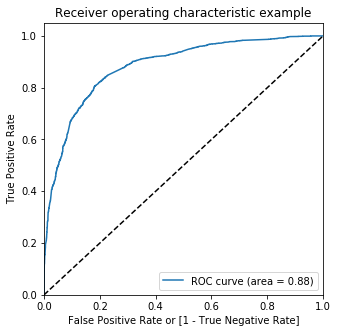

In [168]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.



#### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [169]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.233927,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.305122,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.346621,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.880842,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.824257,7987,1,1,1,1,1,1,1,1,1,1,0


In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.608251  0.970973  0.381050
0.2   0.2  0.742875  0.913737  0.635851
0.3   0.3  0.803968  0.840556  0.781050
0.4   0.4  0.811998  0.763696  0.842254
0.5   0.5  0.815147  0.697874  0.888604
0.6   0.6  0.796882  0.596893  0.922151
0.7   0.7  0.777830  0.508177  0.946735
0.8   0.8  0.756889  0.415781  0.970551
0.9   0.9  0.710912  0.267784  0.988476


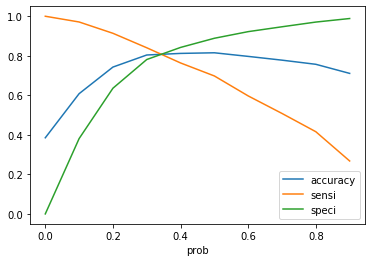

In [171]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [172]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

In [173]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.233927,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.305122,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.346621,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.880842,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.824257,7987,1,1,1,1,1,1,1,1,1,1,0,1


Assigning Lead Score to the Training data

In [174]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.233927,3009,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.305122,1012,0,1,1,1,1,0,0,0,0,0,0,0,31
2,0,0.346621,9226,0,1,1,1,1,0,0,0,0,0,0,0,35
3,1,0.880842,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.824257,7987,1,1,1,1,1,1,1,1,1,1,0,1,82


#### Model Evaluation

In [175]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.812470477090222


In [176]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3186,  719],
       [ 472, 1974]], dtype=int64)

In [177]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8070318887980377


In [179]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8158770806658131


In [180]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.18412291933418695


In [181]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7330115113256591


In [182]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8709677419354839


#### Precision and Recall

In [183]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3470,  435],
       [ 739, 1707]], dtype=int64)

In [184]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7969187675070029


In [185]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6978740801308259


#### Using sklearn utilities for the same

In [186]:
from sklearn.metrics import precision_score, recall_score

In [187]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7969187675070029


In [188]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6978740801308259


#### Precision and recall tradeoff

In [189]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [190]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

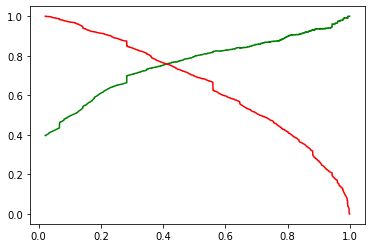

In [191]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The above graph shows the trade-off between the Precision and Recall.

#### Making predictions on the test set

Scaling the test data

In [192]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [193]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0,0,0,0
1490,0,1.887326,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.114929
1490    0.978531
7936    0.098707
4216    0.754631
3830    0.159173
1800    0.704878
6507    0.362002
4821    0.354016
4223    0.942890
4714    0.346621
dtype: float64

In [195]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [196]:
# Let's see the head
y_pred_1.head()

,0
3271,0.114929
1490,0.978531
7936,0.098707
4216,0.754631
3830,0.159173


In [197]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [198]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [199]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [200]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [201]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.114929
1,1,1490,0.978531
2,0,7936,0.098707
3,1,4216,0.754631
4,0,3830,0.159173


In [202]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [203]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [204]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.114929
1,1490,1,0.978531
2,7936,0,0.098707
3,4216,1,0.754631
4,3830,0,0.159173


In [205]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [206]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.114929,0
1,1490,1,0.978531,1
2,7936,0,0.098707,0
3,4216,1,0.754631,1
4,3830,0,0.159173,0


In [207]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8020565552699229


In [208]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1382,  352],
       [ 187,  802]], dtype=int64)

In [209]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [210]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))


Sensitivity : 0.8109201213346815


In [211]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7970011534025375


Assigning Lead Score to the Testing data

In [212]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.114929,0,11
1,1490,1,0.978531,1,98
2,7936,0,0.098707,0,10
3,4216,1,0.754631,1,75
4,3830,0,0.159173,0,16


#### Observations:

After running the model on the Test Data , we obtain:

Accuracy : 80.20%

Sensitivity : 81.09%

Specificity : 79.70%

#### Results 

##### 1)Comparing the values obtained for Train & Test:

##### Train Data:

Accuracy : 81.24%

Sensitivity : 80.7%

Specificity : 81.58%

##### Test Data:

Accuracy : 80.20%

Sensitivity : 81.09%

Specificity : 79.70%


Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we are confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

##### 2) Finding out the leads which should be contacted:

The consumers who have a "Lead Score" of 85 or more are the ones who need to be contacted. They can be termed as 'Hot Leads'.

In [213]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.978531,1,98
8,4223,1,0.942890,1,94
16,1946,1,0.853930,1,85
21,2461,1,0.992577,1,99
23,5822,1,0.997219,1,100
...,...,...,...,...,...
2694,1566,1,0.963076,1,96
2699,6461,1,0.897213,1,90
2703,5741,1,0.919795,1,92
2715,6299,1,0.845990,1,85


As a result, 358 leads can be contacted and have a good probability of becoming customers. The consumers' Prospect IDs to be contacted are:

In [214]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 7674, 8596, 4003, 4963, 6947,  446,  789,
       8372, 5805, 3758,  337, 1561,  737, 9034, 2176, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995,  999, 4498, 5797, 8687, 7653,   76, 2018, 3307, 3976, 5769,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481, 2985,
       3265, 3285, 7433, 3384, 3858, 8106,  373, 3055, 7417, 4179, 8568,
       7268, 4353, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,
        505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 3827, 7175,
       1675, 6999, 5826, 6499, 2481, 3439, 4612, 7129, 4793, 2121, 2495,
        822, 1030, 2378, 5090, 5075,  855, 7699, 5638, 2342, 8077, 2727,
        720,  941, 2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 5135,
       2427, 5087,  174, 2674, 8065, 1568, 8597, 4865, 4708, 1304, 6066,
       6538, 5700, 1388, 5815, 7970, 7902, 5804, 50

##### 3) Finding out the Important Features from our final model:

In [215]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            6.089677
Lead Source_Reference                                   3.997977
Last Activity_Had a Phone Conversation                  2.846818
What is your current occupation_Working Professional    2.715610
Lead Source_Olark Chat                                  1.433655
Last Activity_SMS Sent                                  1.169530
Total Time Spent on Website                             1.118433
Specialization_Others                                  -0.362599
Last Notable Activity_Page Visited on Website          -0.399359
Last Notable Activity_Email Link Clicked               -0.597280
Last Activity_Converted to Lead                        -0.660901
Last Notable Activity_Olark Chat Conversation          -0.666456
Last Activity_Olark Chat Conversation                  -0.836818
Last Notable Activity_Modified                         -0.873581
const                                                  -1.007032
Do Not Email             